In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Load Millburn data
df = pd.read_excel('../raw_data/16618 - Millburn Absence History 7.1.20 to 6.30.25.xlsx')

print(f'Original data shape: {df.shape}')

# Rule 1: Filter out records where Filled = 'Unfilled' AND Needs Substitute = 'NO'
df = df[~((df['Filled'] == 'Unfilled') & (df['Needs Substitute'] == 'NO'))]
print(f'After Unfilled/NO filter: {df.shape}')

# Rule 2: Include only Employee Type = 'Teacher', 'Teacher Music', 'Teacher SpecEd'
df = df[df['Employee Type'].isin(['Teacher', 'Teacher Music', 'Teacher SpecEd'])]
print(f'After Employee Type filter: {df.shape}')

df.head()



Original data shape: (94538, 13)
After Unfilled/NO filter: (51127, 13)
After Employee Type filter: (39948, 13)


,School Year,Date,Reason,Employee Identifier,Hire Date,Employee Title,Employee Type,Start Time,End Time,Duration,Absence Type,Filled,Needs Substitute
8508,2021-2022,2021-10-25,Self,4057,2015-08-13 18:45:38,Grade 3 teacher,Teacher,08:20:00,15:50:00,7.500000,Full Day,Unfilled,YES
8509,2021-2022,2021-11-17,Self,4057,2015-08-13 18:45:38,Grade 3 teacher,Teacher,08:20:00,15:50:00,7.500000,Full Day,Unfilled,YES
8510,2021-2022,2021-11-24,Self,4057,2015-08-13 18:45:38,Grade 3 teacher,Teacher,08:20:00,15:50:00,7.500000,Full Day,Unfilled,YES
8511,2021-2022,2021-12-15,Self,4057,2015-08-13 18:45:38,Grade 3 teacher,Teacher,11:40:00,15:50:00,4.166666,PM Half Day,Filled,YES
8512,2021-2022,2021-12-15,Self,4057,2015-08-13 18:45:38,Grade 3 teacher,Teacher,08:20:00,11:40:00,3.333333,AM Half Day,Unfilled,YES


In [33]:
# Calculate absence days
# Full Day = 1 day, Half Day = 0.5 day, Custom Duration = use Duration column (convert to days)

def calculate_absence_days(row):
    if row['Absence Type'] == 'Full Day':
        return 1.0
    elif row['Absence Type'] in ['AM Half Day', 'PM Half Day']:
        return 0.5
    elif row['Absence Type'] == 'Custom Duration':
        # Duration is in hours, convert to days (assuming 7-8 hours per day, use 7.5 as average)
        hours = pd.to_numeric(row['Duration'], errors='coerce')
        if pd.isna(hours):
            return 0
        return hours / 7.5
    else:
        return 0

df['Absence_Days'] = df.apply(calculate_absence_days, axis=1)

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

print("Absence days calculated")
print(f"Total absence days: {df['Absence_Days'].sum():.2f}")
print(f"\nAbsence Type distribution:")
print(df.groupby('Absence Type')['Absence_Days'].agg(['sum', 'count']))




Absence days calculated
Total absence days: 37530.64

Absence Type distribution:
                          sum  count
Absence Type                        
AM Half Day        949.000000   1898
Custom Duration    185.135546    240
Full Day         34983.000000  34983
PM Half Day       1413.500000   2827


Total Number of Teachers by School Year:
  School Year  Total Teachers
0   2020-2021             237
1   2021-2022             396
2   2022-2023             406
3   2023-2024             417
4   2024-2025             407


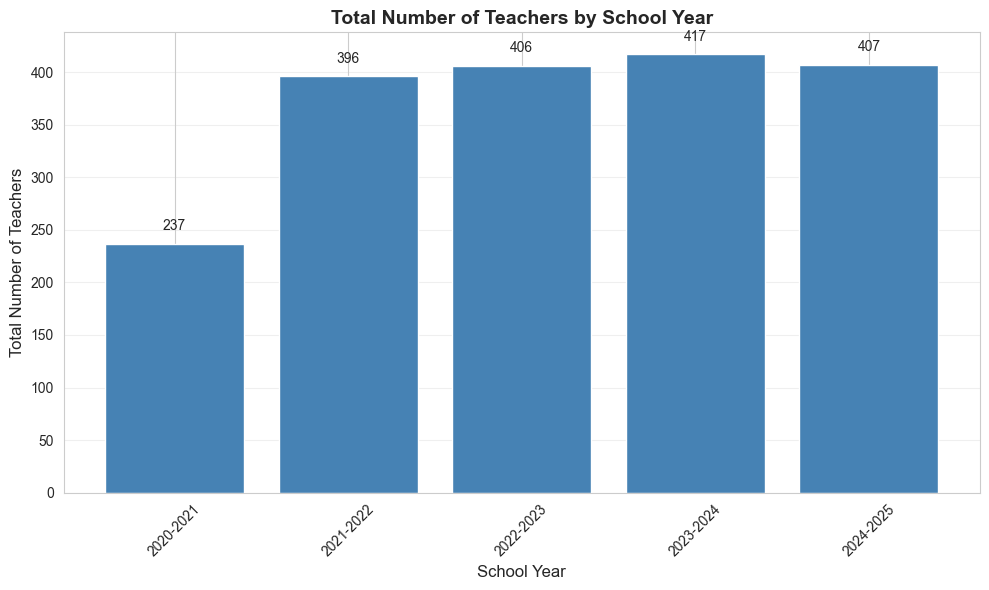

In [34]:
# Total Number of Teachers by School Year
teachers_by_year = df.groupby('School Year')['Employee Identifier'].nunique().reset_index()
teachers_by_year.columns = ['School Year', 'Total Teachers']
teachers_by_year = teachers_by_year.sort_values('School Year')

print("Total Number of Teachers by School Year:")
print(teachers_by_year)

# Visualization
plt.figure(figsize=(10, 6))
plt.bar(teachers_by_year['School Year'], teachers_by_year['Total Teachers'], color='steelblue')
plt.title('Total Number of Teachers by School Year', fontsize=14, fontweight='bold')
plt.xlabel('School Year', fontsize=12)
plt.ylabel('Total Number of Teachers', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(teachers_by_year['Total Teachers']):
    plt.text(i, v + 10, str(int(v)), ha='center', va='bottom')
plt.tight_layout()
plt.show()




Total Number of Teacher Absences by School Year:
  School Year  Total Absences
0   2020-2021            6153
1   2021-2022            8730
2   2022-2023            9343
3   2023-2024            8148
4   2024-2025            7574


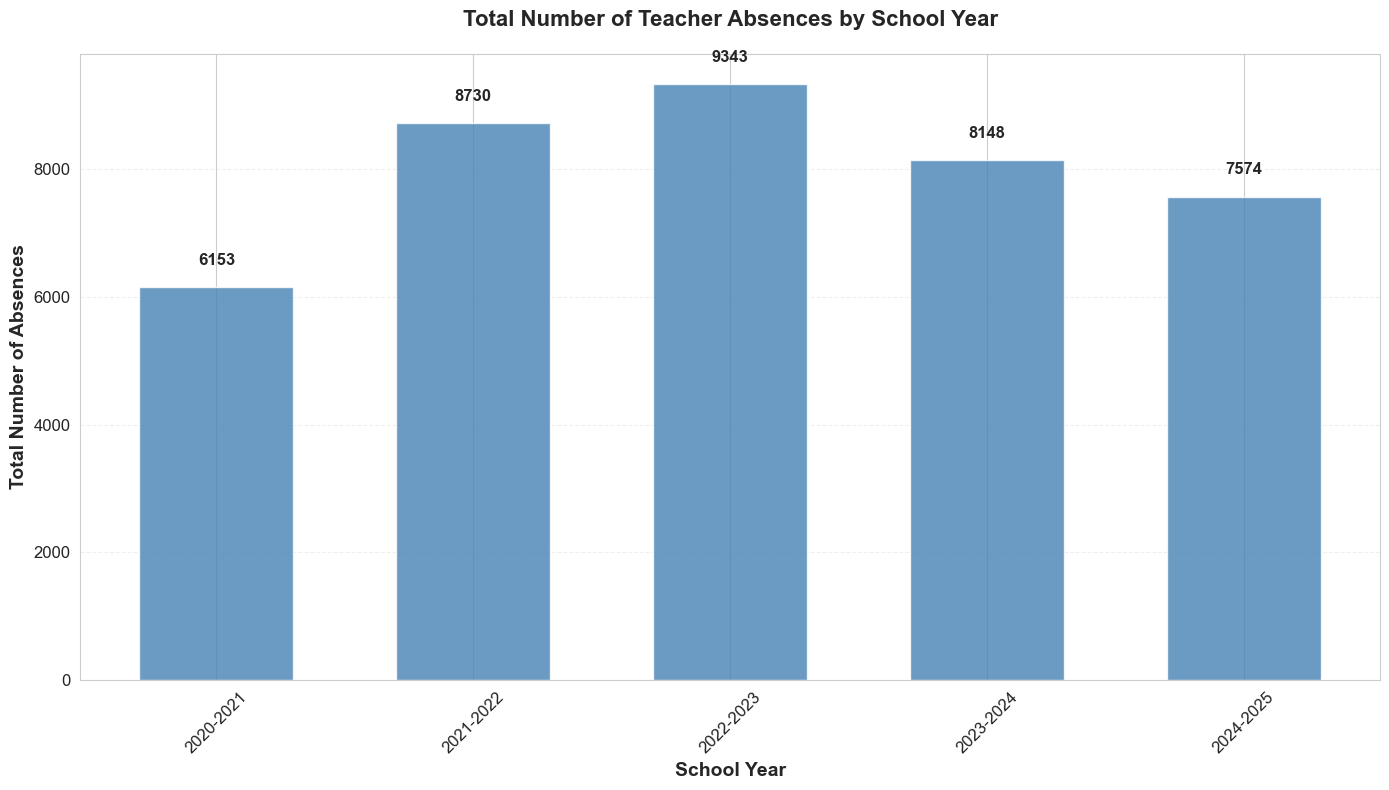

In [35]:
# Total Number of Teacher Absences by School Year - Bar Chart
absences_by_year = df.groupby('School Year').size().reset_index()
absences_by_year.columns = ['School Year', 'Total Absences']
absences_by_year = absences_by_year.sort_values('School Year')

print("Total Number of Teacher Absences by School Year:")
print(absences_by_year)

# Bar chart - separate, larger visualization
plt.figure(figsize=(14, 8))
plt.bar(absences_by_year['School Year'], absences_by_year['Total Absences'], 
        color='steelblue', width=0.6, alpha=0.8)
plt.title('Total Number of Teacher Absences by School Year', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('School Year', fontsize=14, fontweight='bold')
plt.ylabel('Total Number of Absences', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=0.3, linestyle='--')
for i, v in enumerate(absences_by_year['Total Absences']):
    plt.text(i, v + 300, str(int(v)), ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()




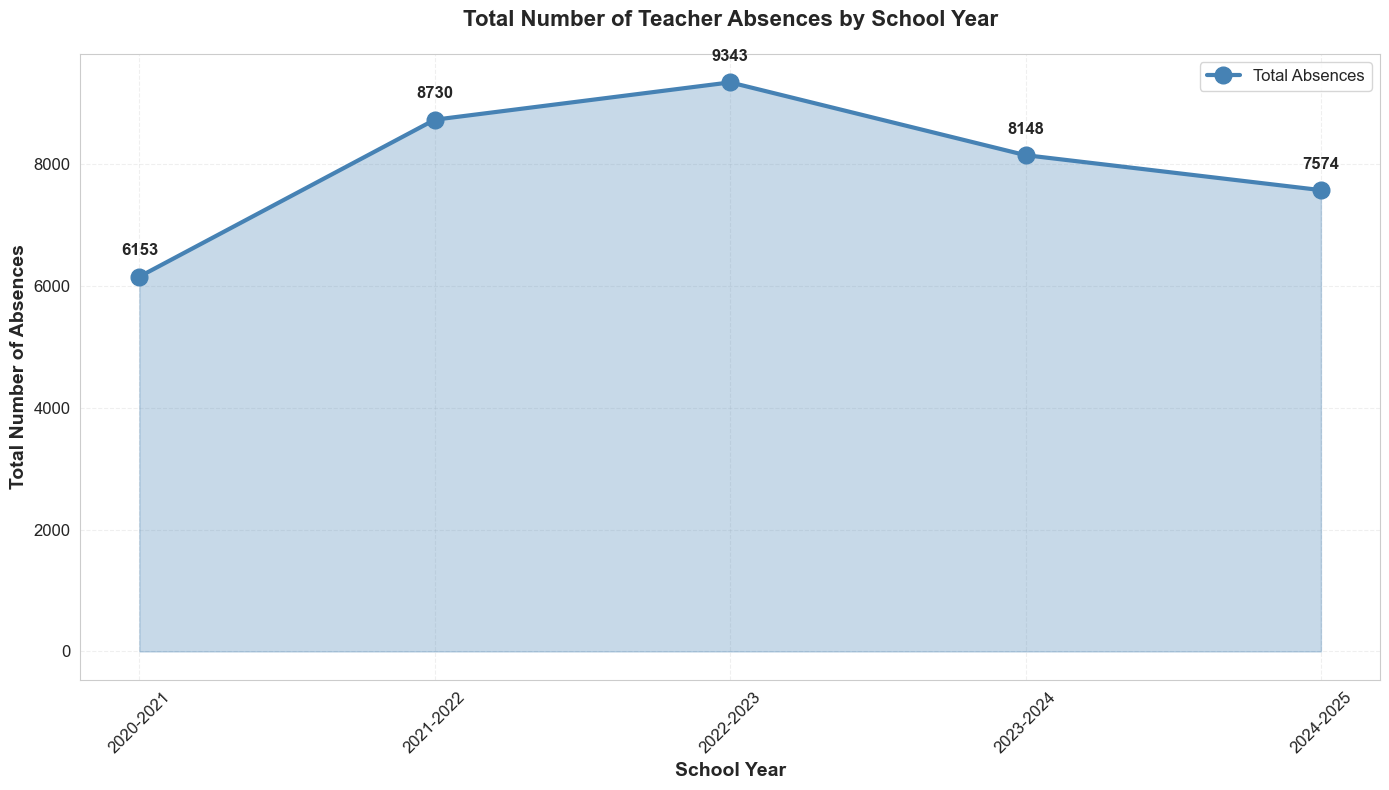

In [36]:
# Total Number of Teacher Absences by School Year - Line Chart
# Make sure absences_by_year is defined (run previous cell first if needed)
if 'absences_by_year' not in locals():
    absences_by_year = df.groupby('School Year').size().reset_index()
    absences_by_year.columns = ['School Year', 'Total Absences']
    absences_by_year = absences_by_year.sort_values('School Year')

# Line chart with area - separate, larger visualization
plt.figure(figsize=(14, 8))
plt.plot(absences_by_year['School Year'], absences_by_year['Total Absences'], 
        marker='o', linewidth=3, markersize=12, color='steelblue', label='Total Absences')
plt.fill_between(absences_by_year['School Year'], absences_by_year['Total Absences'], 
                 alpha=0.3, color='steelblue')
plt.title('Total Number of Teacher Absences by School Year', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('School Year', fontsize=14, fontweight='bold')
plt.ylabel('Total Number of Absences', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, alpha=0.3, linestyle='--')
for i, v in enumerate(absences_by_year['Total Absences']):
    plt.text(i, v + 300, str(int(v)), ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()




In [37]:
# Calculate total absence days per teacher per school year
teacher_absence_days = df.groupby(['School Year', 'Employee Identifier'])['Absence_Days'].sum().reset_index()
teacher_absence_days.columns = ['School Year', 'Employee Identifier', 'Total_Days']

print(f"Total teachers with absences: {teacher_absence_days['Employee Identifier'].nunique()}")
print(f"\nSample data:")
print(teacher_absence_days.head(10))
print(f"\nSummary statistics:")
print(teacher_absence_days.groupby('School Year')['Total_Days'].describe())




Total teachers with absences: 527

Sample data:
  School Year Employee Identifier  Total_Days
0   2020-2021                1058        11.0
1   2020-2021                1063         0.5
2   2020-2021                1097         2.0
3   2020-2021                1156         1.0
4   2020-2021                1238         2.0
5   2020-2021                1241         1.0
6   2020-2021                1357         2.0
7   2020-2021                1487         4.0
8   2020-2021                1492         1.0
9   2020-2021                1502         0.5

Summary statistics:
             count       mean        std  min  25%  50%        75%         max
School Year                                                                   
2020-2021    237.0  25.592968  93.079264  0.5  1.5  3.0   6.444444  920.766667
2021-2022    396.0  20.862912  58.147884  0.5  5.5  9.5  13.483333  601.533333
2022-2023    406.0  21.559387  63.039951  0.5  5.5  9.5  14.000000  627.511111
2023-2024    417.0  18.011804 

In [7]:
# Employee Absence Days by School Year - Summary Table
# Pivot the data to show Employee Identifier as rows and School Year as columns
employee_absence_table = teacher_absence_days.pivot_table(
    index='Employee Identifier',
    columns='School Year',
    values='Total_Days',
    fill_value=0.0
).reset_index()

# Rename columns to match school year format
employee_absence_table.columns.name = None

# Calculate Total column
employee_absence_table['Total'] = employee_absence_table.select_dtypes(include=[np.number]).sum(axis=1)

# Sort by Total descending
employee_absence_table = employee_absence_table.sort_values('Total', ascending=False).reset_index(drop=True)

# Display the table
print("Employee Absence Days by School Year (Top Employees by Total Absence Days)")
print("=" * 100)
print(employee_absence_table.to_string(index=False))
print(f"\nTotal number of employees: {len(employee_absence_table)}")
print(f"\nTop 10 employees by total absence days:")
print(employee_absence_table.head(10).to_string(index=False))




Employee Absence Days by School Year (Top Employees by Total Absence Days)
Employee Identifier  2020-2021  2021-2022  2022-2023  2023-2024  2024-2025       Total
               #002 920.766667 601.533333 511.333333 485.000000 551.000000 3069.633333
               #001 764.200000 596.177777 627.511111 429.355555 426.900000 2844.144444
               #005 388.200000 379.611111 423.500000 438.500000 402.500000 2032.311111
               #006 183.666667 436.988889 461.000000 436.500000 384.000000 1902.155555
               #008 460.500000 195.066667 242.500000 375.955555 382.500000 1656.522222
               #004 126.500000 230.000000 423.000000 421.000000 403.000000 1603.500000
               #007 231.066667 230.655554 366.000000 325.000000 339.500000 1492.222221
               #003 275.566667 214.500000 351.000000 312.000000 264.500000 1417.566667
               3678 184.000000  12.000000 183.000000   0.000000   0.000000  379.000000
               2028 184.000000 123.500000  21.000000   

In [ ]:
# Analysis for different absence day thresholds
# Millburn substitute cost: $153.36 per day
SUBSTITUTE_COST_PER_DAY = 153.36

thresholds = [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
results = {}

for threshold in thresholds:
    # Filter teachers with >threshold days per school year
    teachers_above_threshold = teacher_absence_days[teacher_absence_days['Total_Days'] > threshold].copy()
    
    # Get total teachers per year
    total_teachers = teacher_absence_days.groupby('School Year')['Employee Identifier'].nunique()
    
    # Get teachers above threshold per year
    teachers_above = teachers_above_threshold.groupby('School Year')['Employee Identifier'].nunique()
    
    # Get total days from teachers above threshold per year
    total_days_above = teachers_above_threshold.groupby('School Year')['Total_Days'].sum()
    
    # Calculate percentage
    pct_teachers = (teachers_above / total_teachers * 100).fillna(0)
    
    # Store results
    results[threshold] = {
        'total_teachers': total_teachers,
        'teachers_above': teachers_above,
        'total_days_above': total_days_above,
        'pct_teachers': pct_teachers
    }
    
    print(f"\n=== Threshold: >{threshold} Days ===")
    print(f"Total teachers with >{threshold} days: {len(teachers_above_threshold)}")
    print(f"\nBy School Year:")
    summary = pd.DataFrame({
        'Total Teachers': total_teachers,
        f'Teachers (>{threshold} days)': teachers_above,
        f'Total Days (>{threshold} days)': total_days_above,
        f'% of Teachers': pct_teachers
    }).fillna(0)
    print(summary)





=== Threshold: >10 Days ===
Total teachers with >10 days: 720

By School Year:
             Total Teachers  Teachers (>10 days)  Total Days (>10 days)  \
School Year                                                               
2020-2021               237                   38            5458.900000   
2021-2022               396                  177            6951.404442   
2022-2023               406                  176            7413.744444   
2023-2024               417                  165            6050.122222   
2024-2025               407                  164            5621.799995   

             % of Teachers  
School Year                 
2020-2021        16.033755  
2021-2022        44.696970  
2022-2023        43.349754  
2023-2024        39.568345  
2024-2025        40.294840  

=== Threshold: >15 Days ===
Total teachers with >15 days: 348

By School Year:
             Total Teachers  Teachers (>15 days)  Total Days (>15 days)  \
School Year                         

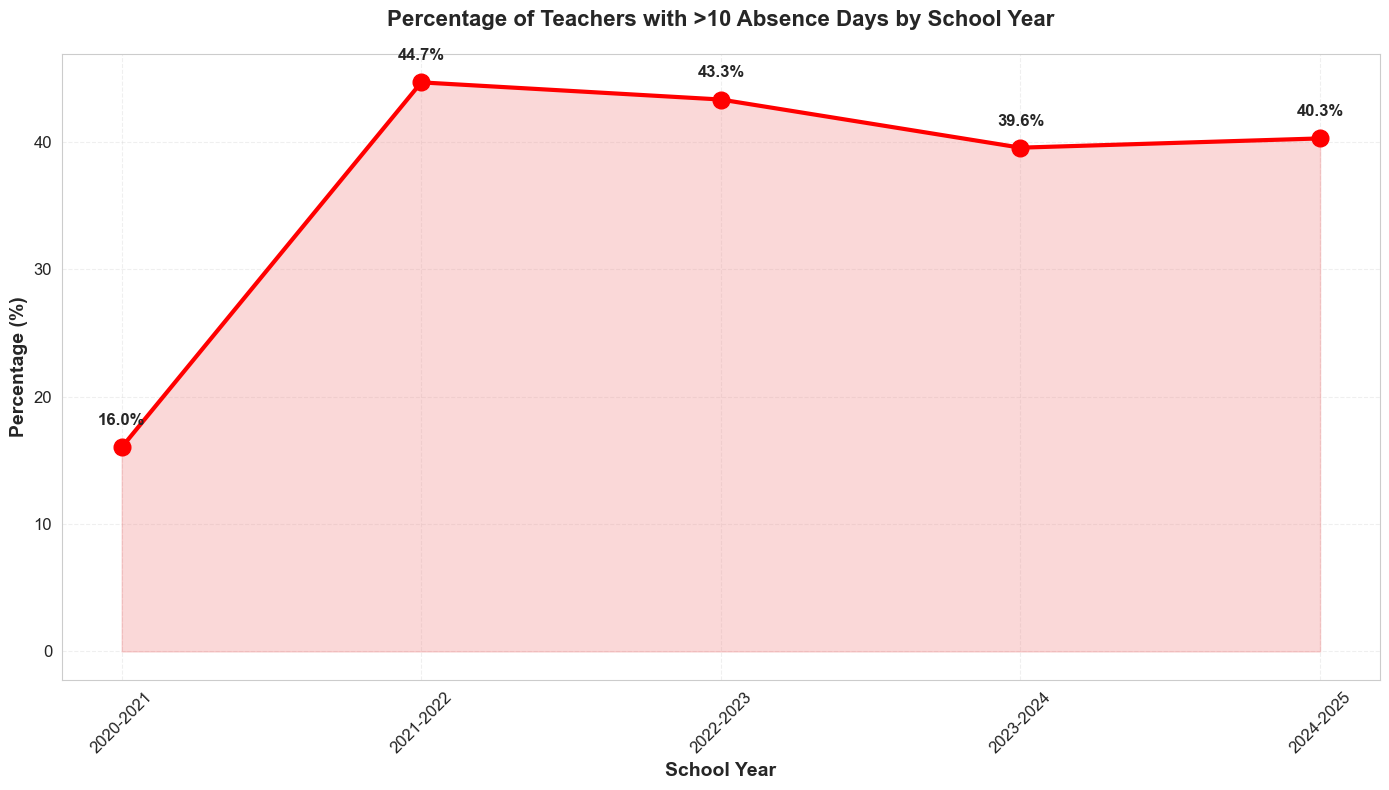

In [39]:
# Percentage of Teachers with >10 Absence Days by School Year
threshold = 10
data = results[threshold]

years = sorted(teacher_absence_days['School Year'].unique())
pct_teachers = [data['pct_teachers'].get(year, 0) for year in years]

plt.figure(figsize=(14, 8))
plt.plot(years, pct_teachers, marker='o', linewidth=3, markersize=12, color='red')
plt.fill_between(years, pct_teachers, alpha=0.3, color='lightcoral')
plt.title(f'Percentage of Teachers with >10 Absence Days by School Year', 
         fontsize=16, fontweight='bold', pad=20)
plt.xlabel('School Year', fontsize=14, fontweight='bold')
plt.ylabel('Percentage (%)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, alpha=0.3, linestyle='--')
for i, v in enumerate(pct_teachers):
    plt.text(i, v + 1.5, f'{v:.1f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()




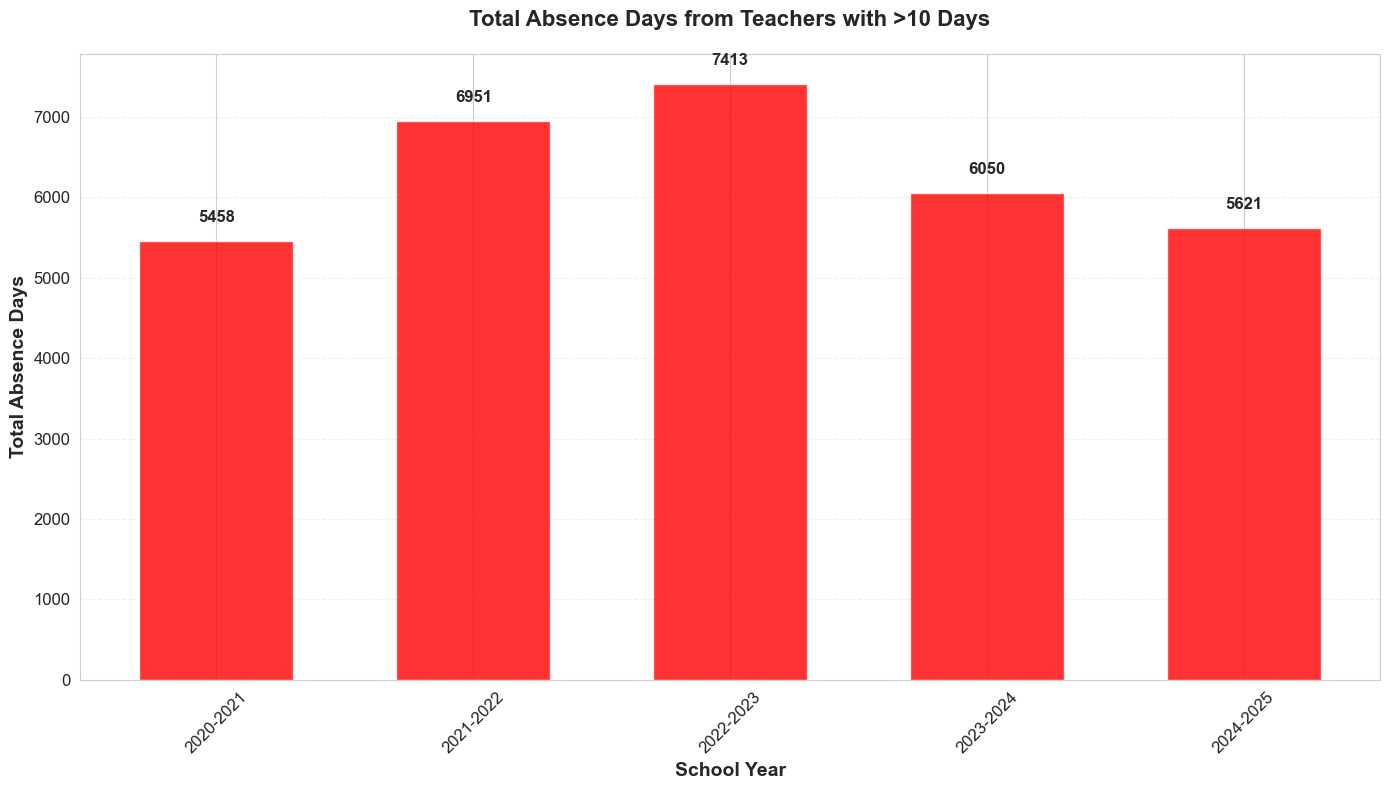

In [40]:
# Total Absence Days from Teachers with >10 Days
threshold = 10
data = results[threshold]

years = sorted(teacher_absence_days['School Year'].unique())
total_days = [data['total_days_above'].get(year, 0) for year in years]

plt.figure(figsize=(14, 8))
plt.bar(years, total_days, color='red', width=0.6, alpha=0.8)
plt.title(f'Total Absence Days from Teachers with >10 Days', 
         fontsize=16, fontweight='bold', pad=20)
plt.xlabel('School Year', fontsize=14, fontweight='bold')
plt.ylabel('Total Absence Days', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=0.3, linestyle='--')
for i, v in enumerate(total_days):
    plt.text(i, v + 200, f'{int(v)}', ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()




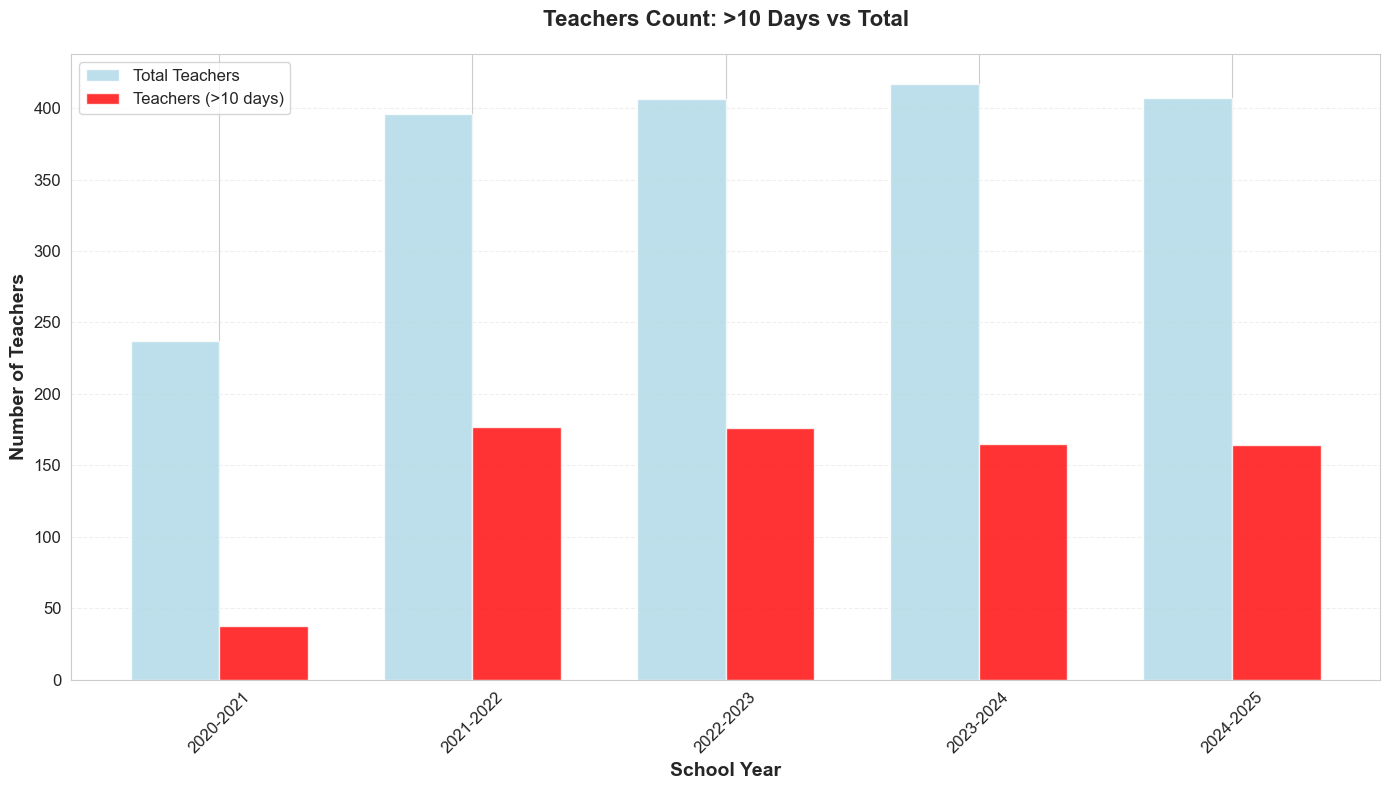

In [41]:
# Teachers Count: >10 Days vs Total
threshold = 10
data = results[threshold]

years = sorted(teacher_absence_days['School Year'].unique())
total_teachers = [data['total_teachers'].get(year, 0) for year in years]
teachers_above = [data['teachers_above'].get(year, 0) for year in years]

x = np.arange(len(years))
width = 0.35

plt.figure(figsize=(14, 8))
plt.bar(x - width/2, total_teachers, width, label='Total Teachers', color='lightblue', alpha=0.8)
plt.bar(x + width/2, teachers_above, width, label=f'Teachers (>10 days)', color='red', alpha=0.8)
plt.title(f'Teachers Count: >10 Days vs Total', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('School Year', fontsize=14, fontweight='bold')
plt.ylabel('Number of Teachers', fontsize=14, fontweight='bold')
plt.xticks(x, years, rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12, loc='upper left')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()




In [ ]:
# ============================================================================
# ABCover Profitability Analysis
# Goal: Find the right combination of waiting period and payment rate to ESS
# that results in profitable coverage while only charging schools 10% more
# ============================================================================

# Constants
ABCOVER_RATE_TO_SCHOOL = 153.36  # Rate ABCover charges to Millburn school per day
FILL_RATE = 0.90  # ESS typically fills 90% of absences
PREMIUM_INCREASE = 0.10  # ABCover charges school 10% more than ESS rate

# Calculate ESS rate (back-calculate: if ABCover charges 10% more, then ESS rate = ABCover rate / 1.10)
CURRENT_ESS_RATE = ABCOVER_RATE_TO_SCHOOL / (1 + PREMIUM_INCREASE)  # ESS's current rate
PREMIUM_PER_DAY = ABCOVER_RATE_TO_SCHOOL - CURRENT_ESS_RATE  # ABCover's revenue per filled absence

print("="*80)
print("ABCOVER PRICING STRUCTURE - MILLBURN")
print("="*80)
print(f"Current ESS Rate (to school): ${CURRENT_ESS_RATE:.2f}/day")
print(f"ABCover Rate to School (10% increase): ${ABCOVER_RATE_TO_SCHOOL:.2f}/day")
print(f"Premium per filled absence: ${PREMIUM_PER_DAY:.2f}/day")
print(f"Total premium on all filled absences = ABCover's Annual Revenue")
print()

# Calculate total absences and filled absences (5-year average)
total_absences_by_year = df.groupby('School Year').size()
avg_absences_per_year = total_absences_by_year.mean()
filled_absences_per_year = avg_absences_per_year * FILL_RATE

print("="*80)
print("ANNUAL ABSENCE STATISTICS (5-Year Average)")
print("="*80)
print(f"Total Absences per Year: {avg_absences_per_year:,.0f}")
print(f"Filled Absences per Year (90% fill rate): {filled_absences_per_year:,.0f}")
print()

# Calculate ABCover's annual revenue (10% premium on ALL filled absences)
# Revenue = Premium per day × ALL Filled Absences (FIXED - does not change with threshold or payment rate)
annual_revenue = filled_absences_per_year * PREMIUM_PER_DAY
print(f"ABCover Annual Revenue (Premium on ALL filled absences): ${annual_revenue:,.2f}")
print(f"  (Premium: ${PREMIUM_PER_DAY:.2f}/day × {filled_absences_per_year:,.0f} filled absences)")
print(f"  This revenue is FIXED - school pays premium on all absences regardless of threshold")
print()

# Calculate ABCover's base rate to ESS (10% less than what ABCover charges school)
ABCOVER_RATE_TO_ESS_BASE = ABCOVER_RATE_TO_SCHOOL * (1 - 0.10)  # 10% less
print(f"ABCover Rate to ESS (10% less than school rate): ${ABCOVER_RATE_TO_ESS_BASE:.2f}/day")
print(f"  (ABCover charges school: ${ABCOVER_RATE_TO_SCHOOL:.2f}/day)")
print(f"  (ABCover pays ESS: ${ABCOVER_RATE_TO_ESS_BASE:.2f}/day)")
print()

# Test all thresholds from 10 to 80 (multiples of 5) - MUST include 25, 35, 45, 50, 55, 60, 65, 70, 75
thresholds_to_test = [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]

# School-specific rate to highlight (rate ABCover charges school)
SCHOOL_RATE = ABCOVER_RATE_TO_SCHOOL  # $153.36 for Millburn
# Calculate the payment rate that would result in this school rate
# If rate_charged_to_school = payment_rate * 1.10, then payment_rate = school_rate / 1.10
PAYMENT_RATE_FOR_SCHOOL_RATE = SCHOOL_RATE / 1.10

# Test different payment rates to ESS (what ABCover pays ESS for reimbursable days)
# MUST include payment rate that results in school rate ($153.36 charged to school = $139.42 paid to ESS)
# This ensures Rate Charged to School = $153.36 appears in every waiting period
# Also include various other rates
payment_rates_to_test = [80, 90, 100, 110, 120, 130, ABCOVER_RATE_TO_ESS_BASE, 140, 150, PAYMENT_RATE_FOR_SCHOOL_RATE]
# Ensure PAYMENT_RATE_FOR_SCHOOL_RATE is included (don't round it out)
payment_rates_to_test = sorted(list(set([round(rate, 2) for rate in payment_rates_to_test])))  # Remove duplicates and sort
# Verify school rate payment is included
if PAYMENT_RATE_FOR_SCHOOL_RATE not in payment_rates_to_test:
    payment_rates_to_test.append(round(PAYMENT_RATE_FOR_SCHOOL_RATE, 2))
    payment_rates_to_test = sorted(list(set(payment_rates_to_test)))

# Get reimbursable days from summary tables (5-year average)
results_matrix = []

for threshold in thresholds_to_test:
    if threshold in summary_tables:
        # Get 5-year average reimbursable days
        avg_row = summary_tables[threshold][summary_tables[threshold]['School Year'] == '5-Year Avg']
        if len(avg_row) > 0:
            reimbursable_days = avg_row['Reimbursable Days'].values[0]
            
            # Apply 90% fill rate to reimbursable days
            filled_reimbursable_days = reimbursable_days * FILL_RATE
            
            for payment_rate in payment_rates_to_test:
                # Revenue is FIXED (premium on ALL filled absences, not just reimbursable days)
                # School pays ABCover premium on all absences regardless of threshold
                # annual_revenue is already calculated above (fixed for all scenarios)
                
                # Rate Charged to School = Rate Paid to ESS × 1.10 (10% more - DYNAMIC)
                rate_charged_to_school = payment_rate * 1.10
                
                # Calculate ABCover's cost (what they pay to ESS for reimbursable days only)
                # Cost = Rate Paid to ESS × Filled Reimbursable Days (only days above threshold)
                abcover_cost = filled_reimbursable_days * payment_rate
                
                # Calculate profit/loss
                # Revenue (fixed) - Cost (varies by threshold and payment rate)
                profit_loss = annual_revenue - abcover_cost
                
                # Calculate profit margin
                profit_margin_pct = (profit_loss / annual_revenue * 100) if annual_revenue > 0 else 0
                
                # Check if Rate Charged to School matches the school-specific rate (to highlight later)
                is_school_rate = (abs(rate_charged_to_school - SCHOOL_RATE) < 0.01)
                
                results_matrix.append({
                    'Waiting Period': f'>{threshold} days',
                    'Reimbursable Days': round(reimbursable_days, 1),
                    'Filled Reimbursable Days': round(filled_reimbursable_days, 1),
                    'Rate Charged to School': f'${rate_charged_to_school:.2f}',
                    'Rate Paid to ESS': f'${payment_rate:.2f}',
                    'Total Cost to ABCover': f'${abcover_cost:,.2f}',
                    'ABCover Annual Revenue': f'${annual_revenue:,.2f}',
                    'Net Profit/Loss': f'${profit_loss:,.2f}',
                    'Profit Margin %': f'{profit_margin_pct:.1f}%',
                    'Is_School_Rate': is_school_rate  # Flag for highlighting
                })

# Create results DataFrame
results_df = pd.DataFrame(results_matrix)

# Display results with color coding
print("\n" + "="*140)
print("PROFITABILITY MATRIX - All Scenarios")
print("="*140)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Convert Net Profit/Loss to numeric for styling
results_df['Profit_Loss_Numeric'] = results_df['Net Profit/Loss'].str.replace('$', '').str.replace(',', '').astype(float)

# Create styled DataFrame with color coding
def color_profit_loss(val):
    """Color profit green, loss red"""
    try:
        if isinstance(val, str):
            # Remove $ and commas, handle negative sign
            numeric_val = float(val.replace('$', '').replace(',', '').strip())
        else:
            numeric_val = float(val)
        if numeric_val > 0:
            return 'background-color: #90EE90'  # Light green
        elif numeric_val < 0:
            return 'background-color: #FFB6C1'  # Light red
        else:
            return 'background-color: #FFFFFF'  # White
    except:
        return 'background-color: #FFFFFF'  # Default white if parsing fails

def highlight_school_rate(row):
    """Highlight rows where Rate Paid to ESS equals school rate"""
    if row.get('Is_School_Rate', False):
        return ['background-color: #FFD700'] * len(row)  # Gold highlight for school rate
    return [''] * len(row)

# Apply styling to Net Profit/Loss column (exclude helper columns from display)
display_df = results_df.drop(columns=['Profit_Loss_Numeric', 'Is_School_Rate'], errors='ignore')
styled_df = display_df.style.applymap(color_profit_loss, subset=['Net Profit/Loss']).apply(highlight_school_rate, axis=1)
from IPython.display import display
display(styled_df)
print()

# Highlight profitable scenarios
profitable_scenarios = results_df[results_df['Profit_Loss_Numeric'] > 0].copy()
print("\n" + "="*140)
print("PROFITABLE SCENARIOS (Profit > $0)")
print("="*140)
if len(profitable_scenarios) > 0:
    # Apply green color to profitable scenarios (exclude helper column from display)
    display_profitable = profitable_scenarios.drop(columns=['Profit_Loss_Numeric'], errors='ignore')
    styled_profitable = display_profitable.style.applymap(lambda x: 'background-color: #90EE90', subset=['Net Profit/Loss'])
    display(styled_profitable)
    print(f"\nTotal Profitable Scenarios: {len(profitable_scenarios)}")
else:
    print("No profitable scenarios found with current parameters.")
print()

# Find optimal scenarios (highest profit)
print("="*140)
print("TOP 15 MOST PROFITABLE SCENARIOS")
print("="*140)

# Get top 15 by profit, but also include school rate scenarios even if not in top 15
top_scenarios = results_df.nlargest(15, 'Profit_Loss_Numeric').copy()

# Also include school rate scenarios if not already in top 15
school_rate_scenarios = results_df[results_df['Is_School_Rate'] == True]
for idx, row in school_rate_scenarios.iterrows():
    if idx not in top_scenarios.index:
        top_scenarios = pd.concat([top_scenarios, pd.DataFrame([row])], ignore_index=True)

# Sort by profit again and take top 15
top_scenarios = top_scenarios.nlargest(15, 'Profit_Loss_Numeric')[['Waiting Period', 'Rate Charged to School', 'Rate Paid to ESS', 
                                                                 'Filled Reimbursable Days',
                                                                 'Total Cost to ABCover', 'ABCover Annual Revenue', 
                                                                 'Net Profit/Loss', 'Profit Margin %', 'Is_School_Rate']].copy()

# Apply styling
def style_top_scenarios(row):
    styles = [''] * len(row)
    profit_loss_idx = list(row.index).index('Net Profit/Loss')
    
    # Color profit/loss
    try:
        profit_val = float(str(row['Net Profit/Loss']).replace('$', '').replace(',', '').strip())
        if profit_val > 0:
            styles[profit_loss_idx] = 'background-color: #90EE90'  # Green
        elif profit_val < 0:
            styles[profit_loss_idx] = 'background-color: #FFB6C1'  # Red
    except:
        pass
    
    # Highlight school rate rows
    if row.get('Is_School_Rate', False):
        styles = ['background-color: #FFD700'] * len(row)  # Gold for entire row
        # But keep profit/loss color
        try:
            profit_val = float(str(row['Net Profit/Loss']).replace('$', '').replace(',', '').strip())
            if profit_val > 0:
                styles[profit_loss_idx] = 'background-color: #90EE90'  # Green
            elif profit_val < 0:
                styles[profit_loss_idx] = 'background-color: #FFB6C1'  # Red
        except:
            pass
    
    return styles

styled_top = top_scenarios.drop(columns=['Is_School_Rate'], errors='ignore').style.apply(style_top_scenarios, axis=1)
display(styled_top)
print()

# Summary by waiting period (best payment rate for each)
print("="*140)
print("BEST PAYMENT RATE FOR EACH WAITING PERIOD (Most Profitable)")
print("="*140)
best_by_threshold = []
for threshold in thresholds_to_test:
    threshold_data = results_df[results_df['Waiting Period'] == f'>{threshold} days']
    if len(threshold_data) > 0:
        best_scenario = threshold_data.nlargest(1, 'Profit_Loss_Numeric')
        if len(best_scenario) > 0 and best_scenario['Profit_Loss_Numeric'].values[0] > 0:
            best_by_threshold.append(best_scenario[['Waiting Period', 'Rate Charged to School', 'Rate Paid to ESS', 
                                                     'Filled Reimbursable Days',
                                                     'Total Cost to ABCover', 'Net Profit/Loss', 'Profit Margin %']].iloc[0])

if len(best_by_threshold) > 0:
    best_df = pd.DataFrame(best_by_threshold)
    # Apply green color to all (they're all profitable)
    styled_best = best_df.style.applymap(lambda x: 'background-color: #90EE90', subset=['Net Profit/Loss'])
    display(styled_best)
else:
    print("No profitable scenarios found.")
print()

ABCOVER PRICING STRUCTURE - MILLBURN
Current ESS Rate (to school): $139.42/day
ABCover Rate to School (10% increase): $153.36/day
Premium per filled absence: $13.94/day
Total premium on all filled absences = ABCover's Annual Revenue

ANNUAL ABSENCE STATISTICS (5-Year Average)
Total Absences per Year: 7,990
Filled Absences per Year (90% fill rate): 7,191

ABCover Annual Revenue (Premium on ALL filled absences): $100,250.60
  (Premium: $13.94/day × 7,191 filled absences)
  This revenue is FIXED - school pays premium on all absences regardless of threshold

ABCover Rate to ESS (10% less than school rate): $138.02/day
  (ABCover charges school: $153.36/day)
  (ABCover pays ESS: $138.02/day)


PROFITABILITY MATRIX - All Scenarios


/var/folders/gq/wkkqjm_d00ggs329s5bxsx300000gn/T/ipykernel_9566/1244976211.py:161: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = display_df.style.applymap(color_profit_loss, subset=['Net Profit/Loss']).apply(highlight_school_rate, axis=1)


,Waiting Period,Reimbursable Days,Filled Reimbursable Days,Rate Charged to School,Rate Paid to ESS,Total Cost to ABCover,ABCover Annual Revenue,Net Profit/Loss,Profit Margin %
0,>10 days,4859.200000,4373.300000,$88.00,$80.00,"$349,862.40","$100,250.60","$-249,611.80",-249.0%
1,>10 days,4859.200000,4373.300000,$99.00,$90.00,"$393,595.20","$100,250.60","$-293,344.60",-292.6%
2,>10 days,4859.200000,4373.300000,$110.00,$100.00,"$437,328.00","$100,250.60","$-337,077.40",-336.2%
3,>10 days,4859.200000,4373.300000,$121.00,$110.00,"$481,060.80","$100,250.60","$-380,810.20",-379.9%
4,>10 days,4859.200000,4373.300000,$132.00,$120.00,"$524,793.60","$100,250.60","$-424,543.00",-423.5%
5,>10 days,4859.200000,4373.300000,$143.00,$130.00,"$568,526.40","$100,250.60","$-468,275.80",-467.1%
6,>10 days,4859.200000,4373.300000,$151.82,$138.02,"$603,600.11","$100,250.60","$-503,349.51",-502.1%
7,>10 days,4859.200000,4373.300000,$153.36,$139.42,"$609,722.70","$100,250.60","$-509,472.10",-508.2%
8,>10 days,4859.200000,4373.300000,$154.00,$140.00,"$612,259.20","$100,250.60","$-512,008.60",-510.7%
9,>10 days,4859.200000,4373.300000,$165.00,$150.00,"$655,992.00","$100,250.60","$-555,741.40",-554.4%




PROFITABLE SCENARIOS (Profit > $0)
No profitable scenarios found with current parameters.

TOP 15 MOST PROFITABLE SCENARIOS


,Waiting Period,Rate Charged to School,Rate Paid to ESS,Filled Reimbursable Days,Total Cost to ABCover,ABCover Annual Revenue,Net Profit/Loss,Profit Margin %
0,>80 days,$88.00,$80.00,2602.900000,"$208,231.20","$100,250.60","$-107,980.60",-107.7%
1,>80 days,$99.00,$90.00,2602.900000,"$234,260.10","$100,250.60","$-134,009.50",-133.7%
2,>40 days,$88.00,$80.00,3214.000000,"$257,119.20","$100,250.60","$-156,868.60",-156.5%
3,>80 days,$110.00,$100.00,2602.900000,"$260,289.00","$100,250.60","$-160,038.40",-159.6%
4,>30 days,$88.00,$80.00,3411.400000,"$272,908.80","$100,250.60","$-172,658.20",-172.2%
5,>80 days,$121.00,$110.00,2602.900000,"$286,317.90","$100,250.60","$-186,067.30",-185.6%
6,>40 days,$99.00,$90.00,3214.000000,"$289,259.10","$100,250.60","$-189,008.50",-188.5%
7,>20 days,$88.00,$80.00,3664.700000,"$293,176.80","$100,250.60","$-192,926.20",-192.4%
8,>30 days,$99.00,$90.00,3411.400000,"$307,022.40","$100,250.60","$-206,771.80",-206.3%
9,>15 days,$88.00,$80.00,3897.000000,"$311,760.00","$100,250.60","$-211,509.40",-211.0%



BEST PAYMENT RATE FOR EACH WAITING PERIOD (Most Profitable)
No profitable scenarios found.



In [ ]:
# Summary tables with deductible days, reimbursable days, and replacement costs
summary_tables = {}

for threshold in thresholds:
    data = results[threshold]
    years = sorted(teacher_absence_days['School Year'].unique())
    
    summary_data = []
    for year in years:
        num_staff = int(data['teachers_above'].get(year, 0))
        total_days = data['total_days_above'].get(year, 0)
        deductible_days = threshold * num_staff  # Insurance coverage starts from day (threshold+1): >10 from day 11, >15 from day 16, >20 from day 21, >30 from day 31, >40 from day 41
        reimbursable_days = total_days - deductible_days
        replacement_cost = reimbursable_days * SUBSTITUTE_COST_PER_DAY
        total_teachers = int(data['total_teachers'].get(year, 0))
        pct_teachers = data['pct_teachers'].get(year, 0)
        
        summary_data.append({
            'School Year': year,
            '# of Staff (>{} days)'.format(threshold): num_staff,
            'Total Days Taken': round(total_days, 1),
            'Deductible Days': -deductible_days,
            'Reimbursable Days': round(reimbursable_days, 1),
            'Replacement Cost': round(replacement_cost, 1),
            '% of Teachers': round(pct_teachers, 1)
        })
    
    # Calculate 5-year average
    avg_num_staff = np.mean([d['# of Staff (>{} days)'.format(threshold)] for d in summary_data])
    avg_total_days = np.mean([d['Total Days Taken'] for d in summary_data])
    avg_deductible = np.mean([abs(d['Deductible Days']) for d in summary_data])
    avg_reimbursable = np.mean([d['Reimbursable Days'] for d in summary_data])
    avg_cost = np.mean([d['Replacement Cost'] for d in summary_data])
    avg_pct = np.mean([d['% of Teachers'] for d in summary_data])
    
    summary_data.append({
        'School Year': '5-Year Avg',
        '# of Staff (>{} days)'.format(threshold): round(avg_num_staff, 1),
        'Total Days Taken': round(avg_total_days, 1),
        'Deductible Days': -round(avg_deductible, 1),
        'Reimbursable Days': round(avg_reimbursable, 1),
        'Replacement Cost': round(avg_cost, 1),
        '% of Teachers': round(avg_pct, 1)
    })
    
    summary_df = pd.DataFrame(summary_data)
    summary_tables[threshold] = summary_df
    
    print(f"\n{'='*80}")
    print(f"GREATER THAN {threshold} DAYS ABSENCE SUMMARY (Replacement Cost @ ${SUBSTITUTE_COST_PER_DAY}/day)")
    print(f"{'='*80}")
    print(summary_df.to_string(index=False))
    print()





GREATER THAN 10 DAYS ABSENCE SUMMARY (Replacement Cost @ $153.36/day)
School Year  # of Staff (>10 days)  Total Days Taken  Deductible Days  Reimbursable Days  Replacement Cost  % of Teachers
  2020-2021                   38.0            5458.9           -380.0             5078.9          778900.1           16.0
  2021-2022                  177.0            6951.4          -1770.0             5181.4          794620.2           44.7
  2022-2023                  176.0            7413.7          -1760.0             5653.7          867058.2           43.3
  2023-2024                  165.0            6050.1          -1650.0             4400.1          674802.7           39.6
  2024-2025                  164.0            5621.8          -1640.0             3981.8          610648.8           40.3
 5-Year Avg                  144.0            6299.2          -1440.0             4859.2          745206.0           36.8


GREATER THAN 15 DAYS ABSENCE SUMMARY (Replacement Cost @ $153.36/day)
Sch

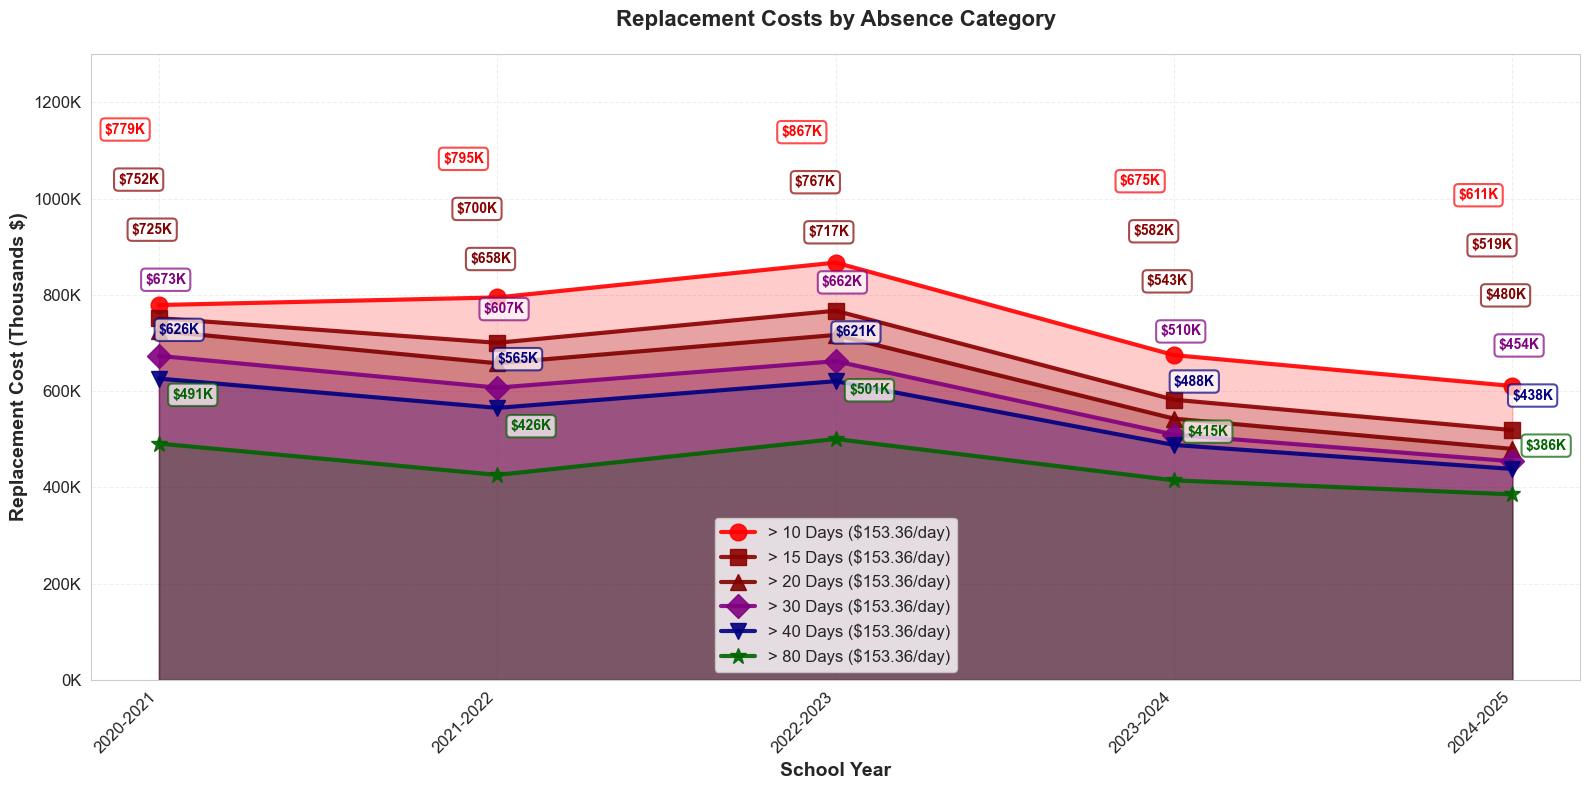

In [ ]:
# Replacement Costs by Absence Category
years = sorted(teacher_absence_days['School Year'].unique())

# Prepare data for replacement costs
replacement_costs = {}
for threshold in thresholds:
    costs = []
    for year in years:
        summary = summary_tables[threshold]
        year_data = summary[summary['School Year'] == year]
        if len(year_data) > 0:
            costs.append(year_data['Replacement Cost'].values[0])
        else:
            costs.append(0)
    replacement_costs[threshold] = costs

plt.figure(figsize=(16, 8))
plt.plot(years, replacement_costs[10], marker='o', linewidth=3, markersize=12, 
         label='> 10 Days ($153.36/day)', color='red', alpha=0.9)
plt.fill_between(years, replacement_costs[10], alpha=0.2, color='red')
plt.plot(years, replacement_costs[15], marker='s', linewidth=3, markersize=12, 
         label='> 15 Days ($153.36/day)', color='darkred', alpha=0.9)
plt.fill_between(years, replacement_costs[15], alpha=0.2, color='darkred')
plt.plot(years, replacement_costs[20], marker='^', linewidth=3, markersize=12, 
         label='> 20 Days ($153.36/day)', color='maroon', alpha=0.9)
plt.fill_between(years, replacement_costs[20], alpha=0.2, color='maroon')
plt.plot(years, replacement_costs[30], marker='D', linewidth=3, markersize=12, 
         label='> 30 Days ($153.36/day)', color='purple', alpha=0.9)
plt.fill_between(years, replacement_costs[30], alpha=0.2, color='purple')
plt.plot(years, replacement_costs[40], marker='v', linewidth=3, markersize=12, 
         label='> 40 Days ($153.36/day)', color='navy', alpha=0.9)
plt.fill_between(years, replacement_costs[40], alpha=0.2, color='navy')

# Set y-axis limit to give more room for labels
max_cost = max(max(replacement_costs[10]), max(replacement_costs[15]), max(replacement_costs[20]),
               max(replacement_costs[30]), max(replacement_costs[40]))
plt.ylim(0, max_cost * 1.50)  # Add 50% more space at top for clear label positioning

# Add cost labels at each data point - position with much better clearance from markers
for i, year in enumerate(years):
    # Get all values for this year and sort them by value (lowest to highest)
    values_at_year = [(threshold, replacement_costs[threshold][i]) for threshold in [10, 15, 20, 30, 40]]
    values_at_year.sort(key=lambda x: x[1])  # Sort by actual value
    
    # Calculate spacing - use larger values for better readability
    min_spacing = max_cost * 0.12  # Minimum 12% of max cost between labels (increased from 8%)
    base_clearance = max_cost * 0.10  # 10% of max cost as minimum clearance above marker (increased from 6%)
    
    # Position labels from bottom to top with generous spacing
    label_positions = {}
    prev_y_pos = None
    
    for rank, (threshold, value) in enumerate(values_at_year):
        # Calculate desired position well above the marker
        desired_pos = value + base_clearance
        
        # If this isn't the first label, ensure it's well spaced above the previous one
        if prev_y_pos is not None:
            # Make sure there's enough spacing between labels
            if desired_pos < prev_y_pos + min_spacing:
                y_pos = prev_y_pos + min_spacing
            else:
                y_pos = desired_pos
        else:
            # First (lowest) label - ensure good clearance from marker
            y_pos = desired_pos
        
        label_positions[threshold] = y_pos
        prev_y_pos = y_pos
    
    # Plot labels with better positioning - slightly offset horizontally to avoid marker overlap
    color_map = {10: 'red', 15: 'darkred', 20: 'maroon', 30: 'purple', 40: 'navy'}
    # Horizontal offset pattern to spread labels left/right slightly
    h_offsets = {10: -0.08, 15: -0.04, 20: 0.0, 30: 0.04, 40: 0.08}
    
    for threshold in [10, 15, 20, 30, 40]:
        value = replacement_costs[threshold][i]
        y_pos = label_positions[threshold]
        color = color_map[threshold]
        # Add horizontal offset to avoid direct overlap with markers
        x_pos = i + h_offsets[threshold]
        plt.text(x_pos, y_pos, f'${value/1000:.0f}K', 
                 ha='center', va='bottom', fontsize=10, fontweight='bold', color=color,
                 bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor=color, alpha=0.7, linewidth=1.5))
plt.title('Replacement Costs by Absence Category', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('School Year', fontsize=14, fontweight='bold')
plt.ylabel('Replacement Cost (Thousands $)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=12, ha='right')  # Align rotated labels to the right
plt.yticks(fontsize=12)
plt.legend(fontsize=12, loc='best')
plt.grid(True, alpha=0.3, linestyle='--')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1000:.0f}K'))
plt.tight_layout()
plt.show()




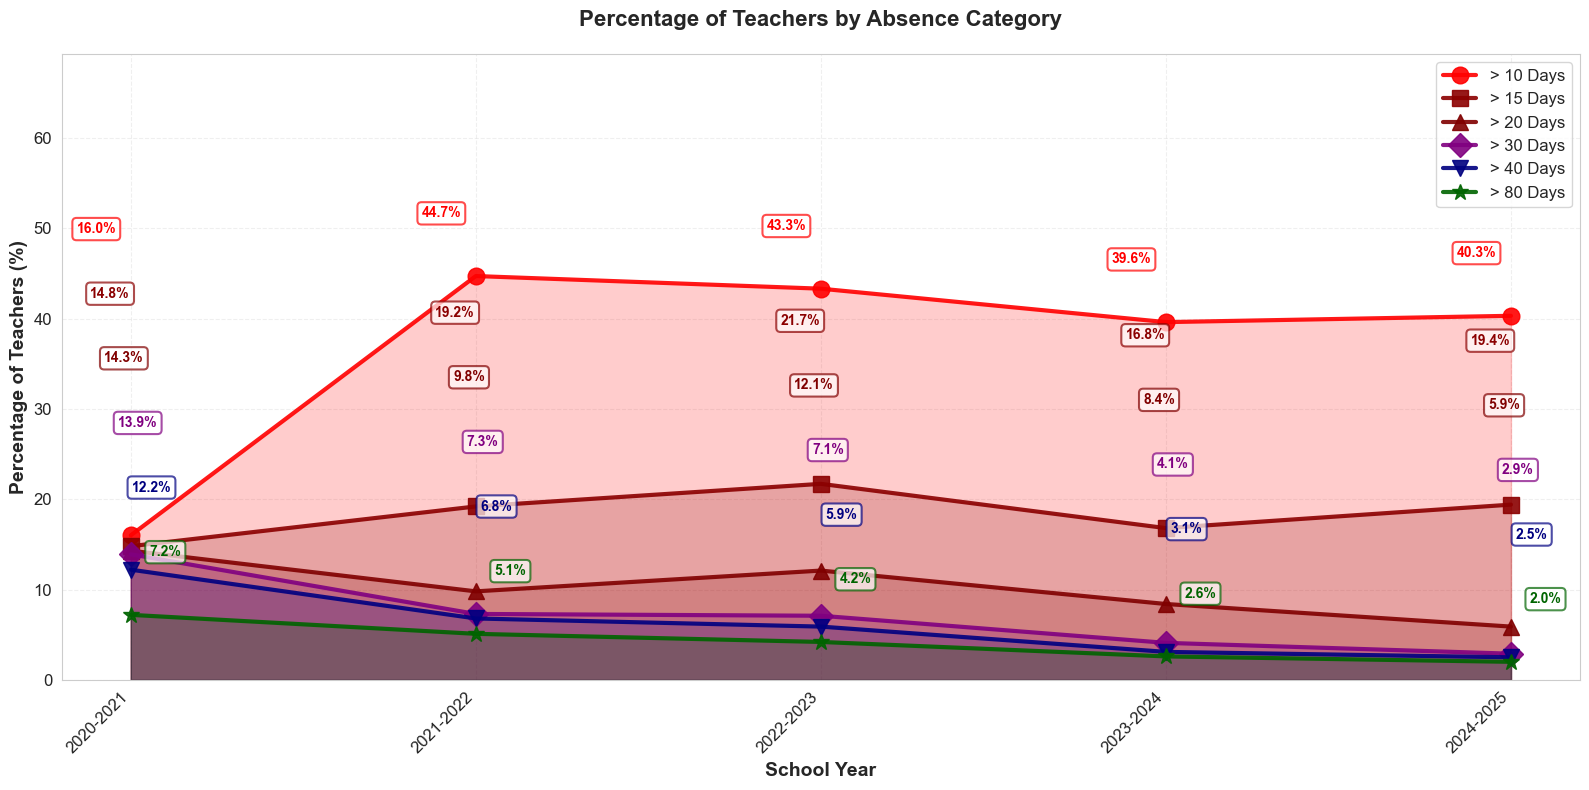

In [14]:
# Percentage of Teachers by Absence Category
years = sorted(teacher_absence_days['School Year'].unique())

# Prepare data for percentages
pct_teachers_combined = {}
for threshold in thresholds:
    pcts = []
    for year in years:
        summary = summary_tables[threshold]
        year_data = summary[summary['School Year'] == year]
        if len(year_data) > 0:
            pcts.append(year_data['% of Teachers'].values[0])
        else:
            pcts.append(0)
    pct_teachers_combined[threshold] = pcts

plt.figure(figsize=(16, 8))
plt.plot(years, pct_teachers_combined[10], marker='o', linewidth=3, markersize=12, 
         label='> 10 Days', color='red', alpha=0.9)
plt.fill_between(years, pct_teachers_combined[10], alpha=0.2, color='red')
plt.plot(years, pct_teachers_combined[15], marker='s', linewidth=3, markersize=12, 
         label='> 15 Days', color='darkred', alpha=0.9)
plt.fill_between(years, pct_teachers_combined[15], alpha=0.2, color='darkred')
plt.plot(years, pct_teachers_combined[20], marker='^', linewidth=3, markersize=12, 
         label='> 20 Days', color='maroon', alpha=0.9)
plt.fill_between(years, pct_teachers_combined[20], alpha=0.2, color='maroon')
plt.plot(years, pct_teachers_combined[30], marker='D', linewidth=3, markersize=12, 
         label='> 30 Days', color='purple', alpha=0.9)
plt.fill_between(years, pct_teachers_combined[30], alpha=0.2, color='purple')
plt.plot(years, pct_teachers_combined[40], marker='v', linewidth=3, markersize=12, 
         label='> 40 Days', color='navy', alpha=0.9)
plt.fill_between(years, pct_teachers_combined[40], alpha=0.2, color='navy')

# Set y-axis limit to give more room for labels
max_pct = max(max(pct_teachers_combined[10]), max(pct_teachers_combined[15]), max(pct_teachers_combined[20]),
              max(pct_teachers_combined[30]), max(pct_teachers_combined[40]))
plt.ylim(0, max_pct * 1.55)  # Add 55% more space at top for clear label positioning

# Add percentage labels at each data point - position with much better clearance from markers
for i, year in enumerate(years):
    # Get all values for this year and sort them by value (lowest to highest)
    values_at_year = [(threshold, pct_teachers_combined[threshold][i]) for threshold in [10, 15, 20, 30, 40]]
    values_at_year.sort(key=lambda x: x[1])  # Sort by actual value
    
    # Calculate spacing - use larger values for better readability
    min_spacing = max_pct * 0.16  # Minimum 16% of max percentage between labels (increased from 12%)
    base_clearance = max_pct * 0.12  # 12% of max percentage as minimum clearance above marker (increased from 8%)
    
    # Position labels from bottom to top with generous spacing
    label_positions = {}
    prev_y_pos = None
    
    for rank, (threshold, value) in enumerate(values_at_year):
        # Calculate desired position well above the marker
        desired_pos = value + base_clearance + 0.8
        
        # If this isn't the first label, ensure it's well spaced above the previous one
        if prev_y_pos is not None:
            # Make sure there's enough spacing between labels
            if desired_pos < prev_y_pos + min_spacing:
                y_pos = prev_y_pos + min_spacing
            else:
                y_pos = desired_pos
        else:
            # First (lowest) label - ensure good clearance from marker
            y_pos = desired_pos
        
        label_positions[threshold] = y_pos
        prev_y_pos = y_pos
    
    # Plot labels with better positioning - slightly offset horizontally to avoid marker overlap
    color_map = {10: 'red', 15: 'darkred', 20: 'maroon', 30: 'purple', 40: 'navy'}
    # Horizontal offset pattern to spread labels left/right slightly
    h_offsets = {10: -0.08, 15: -0.04, 20: 0.0, 30: 0.04, 40: 0.08}
    
    for threshold in [10, 15, 20, 30, 40]:
        value = pct_teachers_combined[threshold][i]
        y_pos = label_positions[threshold]
        color = color_map[threshold]
        # Add horizontal offset to avoid direct overlap with markers
        x_pos = i + h_offsets[threshold]
        plt.text(x_pos, y_pos, f'{value:.1f}%', 
                 ha='center', va='bottom', fontsize=10, fontweight='bold', color=color,
                 bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor=color, alpha=0.7, linewidth=1.5))
plt.title('Percentage of Teachers by Absence Category', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('School Year', fontsize=14, fontweight='bold')
plt.ylabel('Percentage of Teachers (%)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=12, ha='right')  # Align rotated labels to the right
plt.yticks(fontsize=12)
plt.legend(fontsize=12, loc='best')
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()




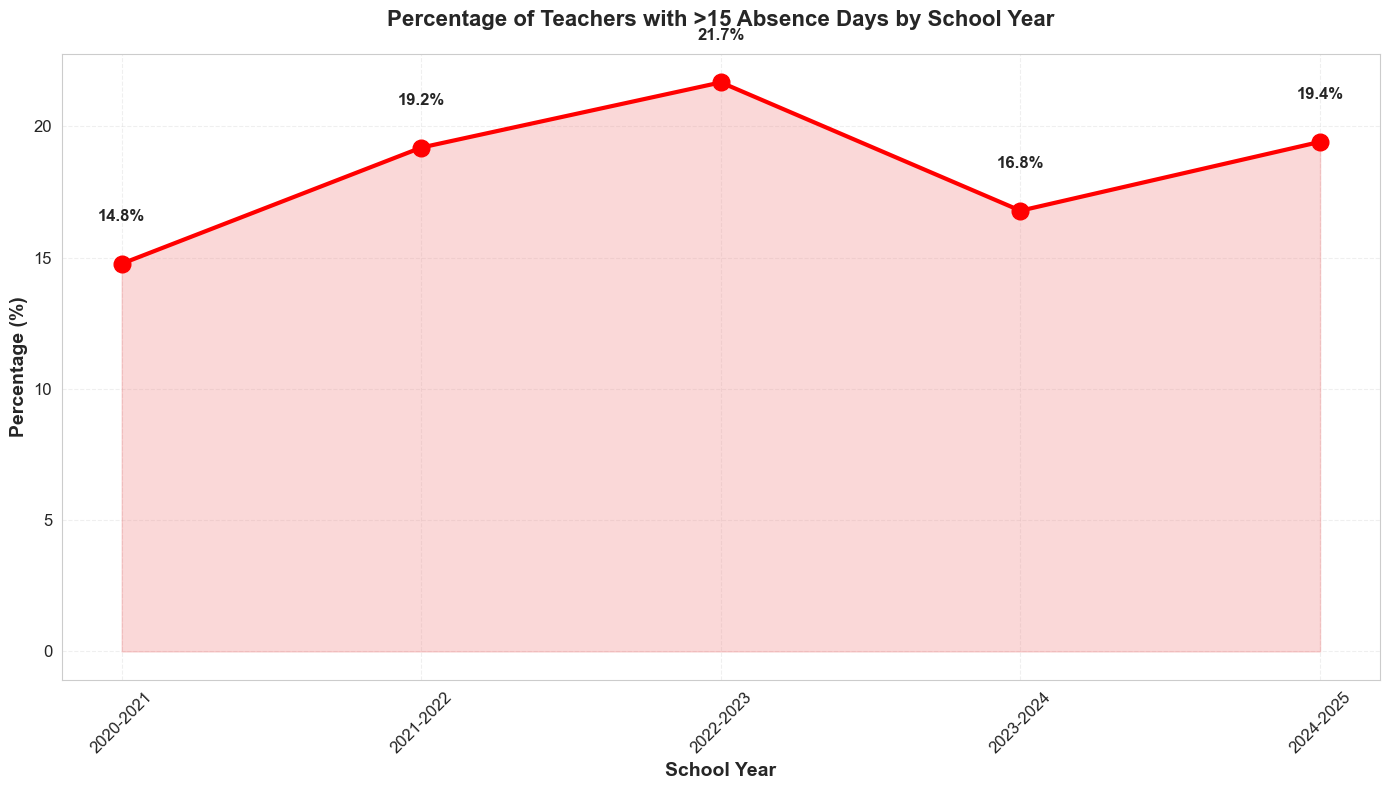

In [15]:
# Percentage of Teachers with >15 Absence Days by School Year
threshold = 15
data = results[threshold]

years = sorted(teacher_absence_days['School Year'].unique())
pct_teachers = [data['pct_teachers'].get(year, 0) for year in years]

plt.figure(figsize=(14, 8))
plt.plot(years, pct_teachers, marker='o', linewidth=3, markersize=12, color='red')
plt.fill_between(years, pct_teachers, alpha=0.3, color='lightcoral')
plt.title(f'Percentage of Teachers with >15 Absence Days by School Year', 
         fontsize=16, fontweight='bold', pad=20)
plt.xlabel('School Year', fontsize=14, fontweight='bold')
plt.ylabel('Percentage (%)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, alpha=0.3, linestyle='--')
for i, v in enumerate(pct_teachers):
    plt.text(i, v + 1.5, f'{v:.1f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()




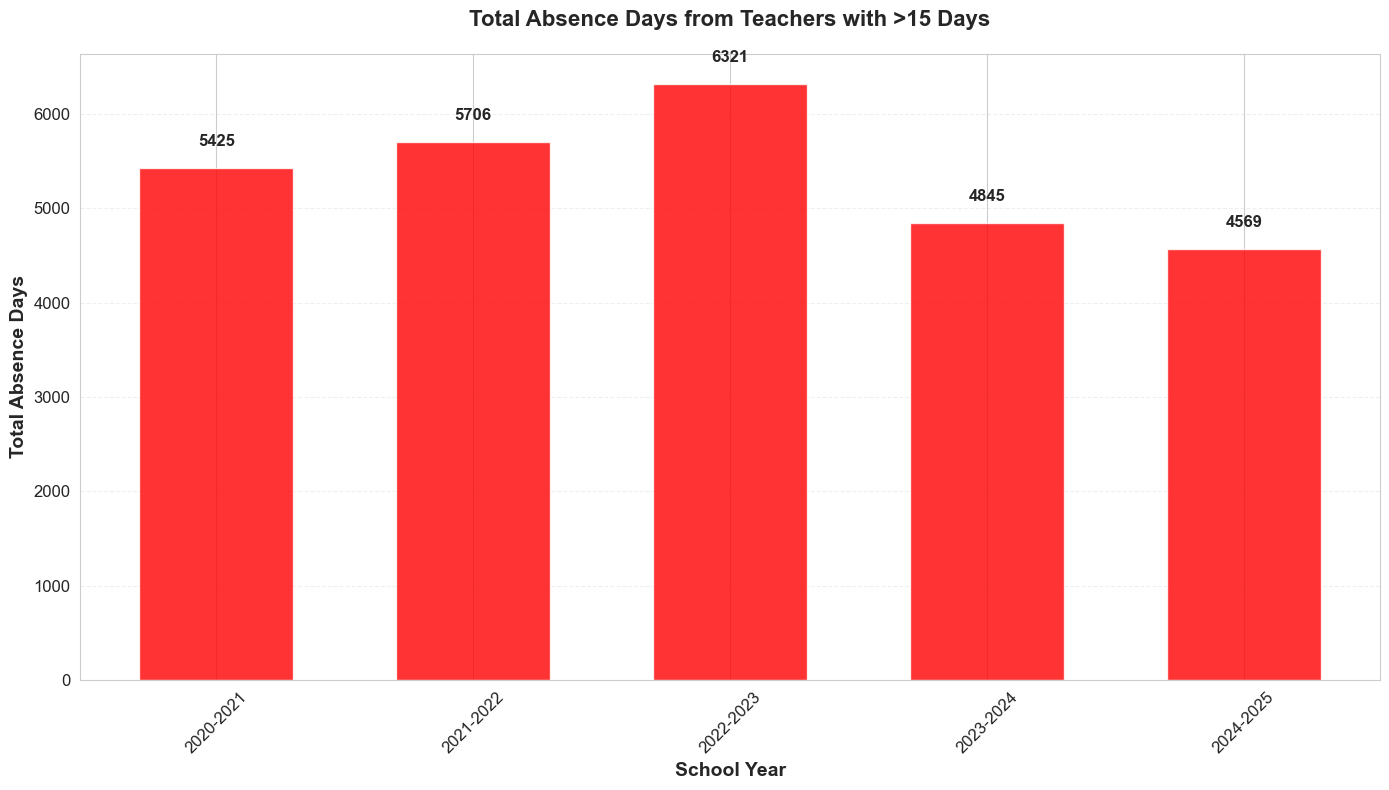

In [37]:
# Total Absence Days from Teachers with >15 Days
threshold = 15
data = results[threshold]

years = sorted(teacher_absence_days['School Year'].unique())
total_days = [data['total_days_above'].get(year, 0) for year in years]

plt.figure(figsize=(14, 8))
plt.bar(years, total_days, color='red', width=0.6, alpha=0.8)
plt.title(f'Total Absence Days from Teachers with >15 Days', 
         fontsize=16, fontweight='bold', pad=20)
plt.xlabel('School Year', fontsize=14, fontweight='bold')
plt.ylabel('Total Absence Days', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=0.3, linestyle='--')
for i, v in enumerate(total_days):
    plt.text(i, v + 200, f'{int(v)}', ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()




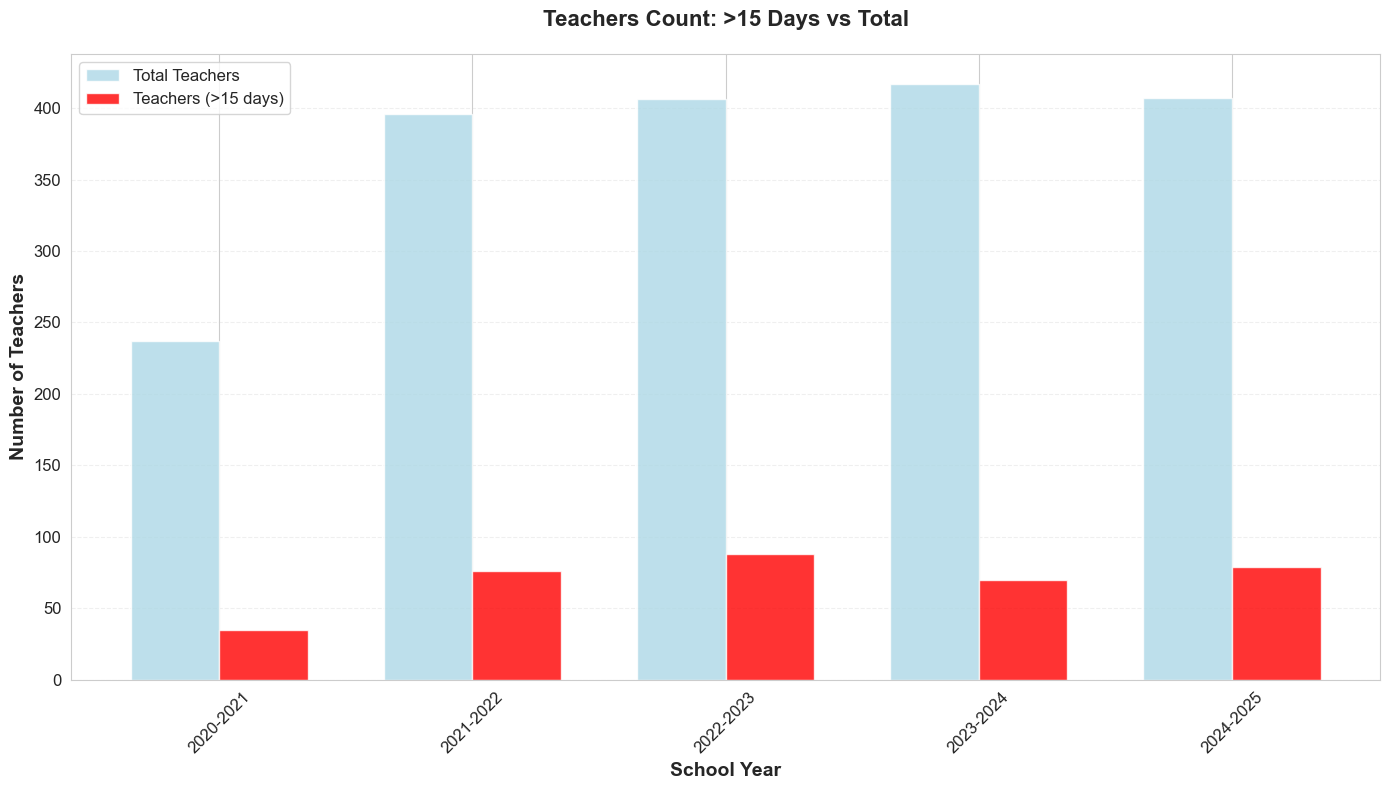

In [16]:
# Teachers Count: >15 Days vs Total
threshold = 15
data = results[threshold]

years = sorted(teacher_absence_days['School Year'].unique())
total_teachers = [data['total_teachers'].get(year, 0) for year in years]
teachers_above = [data['teachers_above'].get(year, 0) for year in years]

x = np.arange(len(years))
width = 0.35

plt.figure(figsize=(14, 8))
plt.bar(x - width/2, total_teachers, width, label='Total Teachers', color='lightblue', alpha=0.8)
plt.bar(x + width/2, teachers_above, width, label=f'Teachers (>15 days)', color='red', alpha=0.8)
plt.title(f'Teachers Count: >15 Days vs Total', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('School Year', fontsize=14, fontweight='bold')
plt.ylabel('Number of Teachers', fontsize=14, fontweight='bold')
plt.xticks(x, years, rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12, loc='upper left')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()




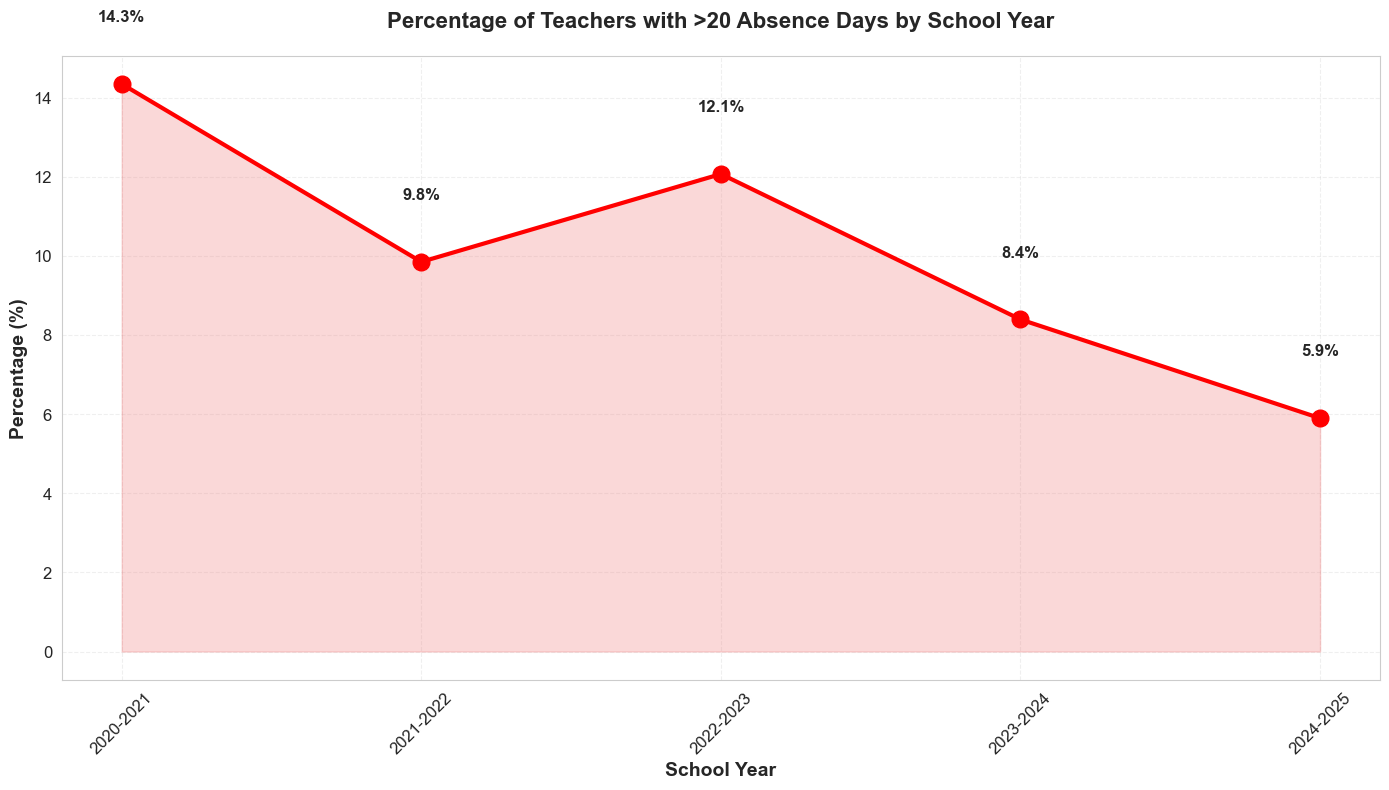

In [39]:
# Percentage of Teachers with >20 Absence Days by School Year
threshold = 20
data = results[threshold]

years = sorted(teacher_absence_days['School Year'].unique())
pct_teachers = [data['pct_teachers'].get(year, 0) for year in years]

plt.figure(figsize=(14, 8))
plt.plot(years, pct_teachers, marker='o', linewidth=3, markersize=12, color='red')
plt.fill_between(years, pct_teachers, alpha=0.3, color='lightcoral')
plt.title(f'Percentage of Teachers with >20 Absence Days by School Year', 
         fontsize=16, fontweight='bold', pad=20)
plt.xlabel('School Year', fontsize=14, fontweight='bold')
plt.ylabel('Percentage (%)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, alpha=0.3, linestyle='--')
for i, v in enumerate(pct_teachers):
    plt.text(i, v + 1.5, f'{v:.1f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()




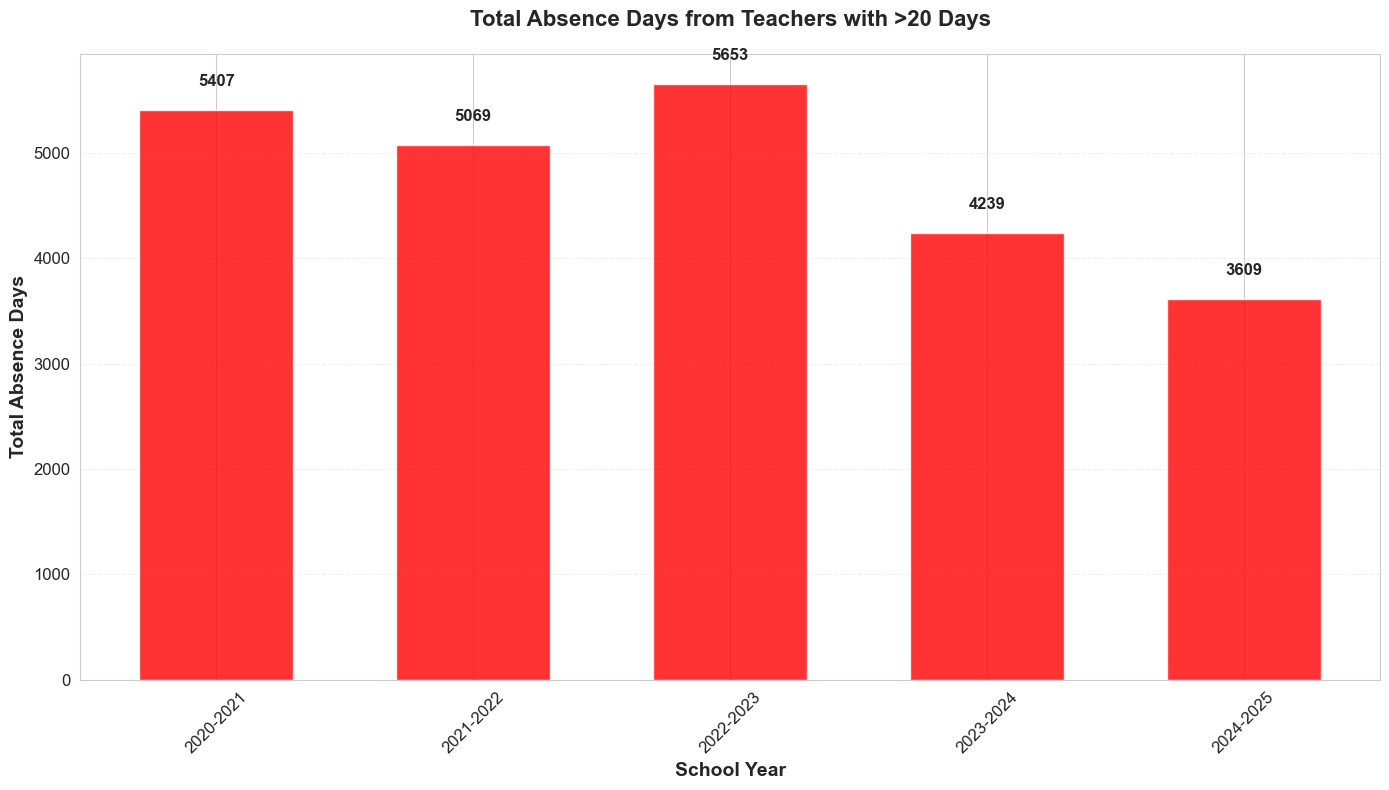

In [17]:
# Total Absence Days from Teachers with >20 Days
threshold = 20
data = results[threshold]

years = sorted(teacher_absence_days['School Year'].unique())
total_days = [data['total_days_above'].get(year, 0) for year in years]

plt.figure(figsize=(14, 8))
plt.bar(years, total_days, color='red', width=0.6, alpha=0.8)
plt.title(f'Total Absence Days from Teachers with >20 Days', 
         fontsize=16, fontweight='bold', pad=20)
plt.xlabel('School Year', fontsize=14, fontweight='bold')
plt.ylabel('Total Absence Days', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=0.3, linestyle='--')
for i, v in enumerate(total_days):
    plt.text(i, v + 200, f'{int(v)}', ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()




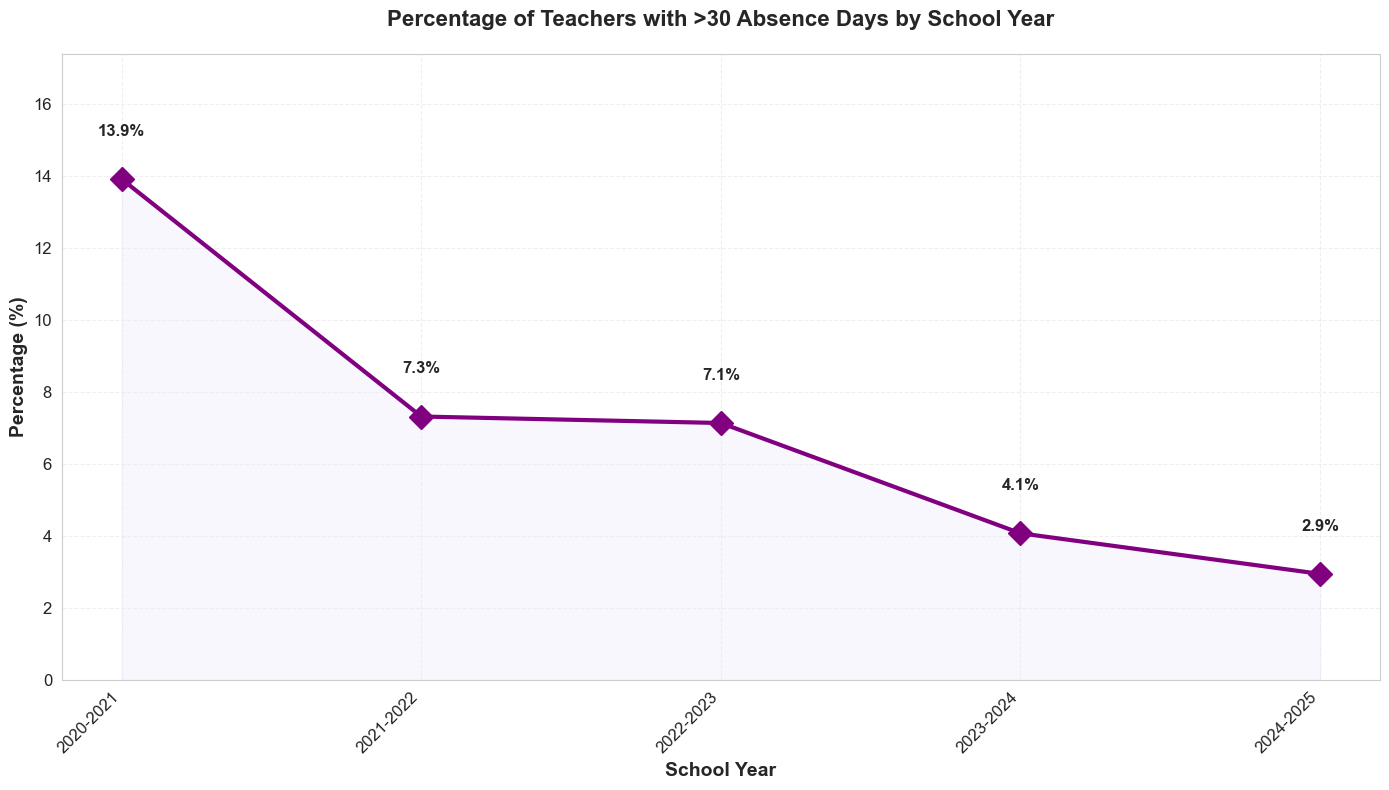

In [18]:
# Percentage of Teachers with >30 Absence Days by School Year
threshold = 30
data = results[threshold]

years = sorted(teacher_absence_days['School Year'].unique())
pct_teachers = [data['pct_teachers'].get(year, 0) for year in years]

plt.figure(figsize=(14, 8))
plt.plot(years, pct_teachers, marker='D', linewidth=3, markersize=12, color='purple')
plt.fill_between(years, pct_teachers, alpha=0.3, color='lavender')

max_pct = max(pct_teachers) if pct_teachers else 0
plt.ylim(0, max_pct * 1.25)

plt.title(f'Percentage of Teachers with >30 Absence Days by School Year', 
         fontsize=16, fontweight='bold', pad=20)
plt.xlabel('School Year', fontsize=14, fontweight='bold')
plt.ylabel('Percentage (%)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=12, ha='right')
plt.yticks(fontsize=12)
plt.grid(True, alpha=0.3, linestyle='--')

offset = max(max_pct * 0.08, 0.5)
for i, v in enumerate(pct_teachers):
    plt.text(i, v + offset, f'{v:.1f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()


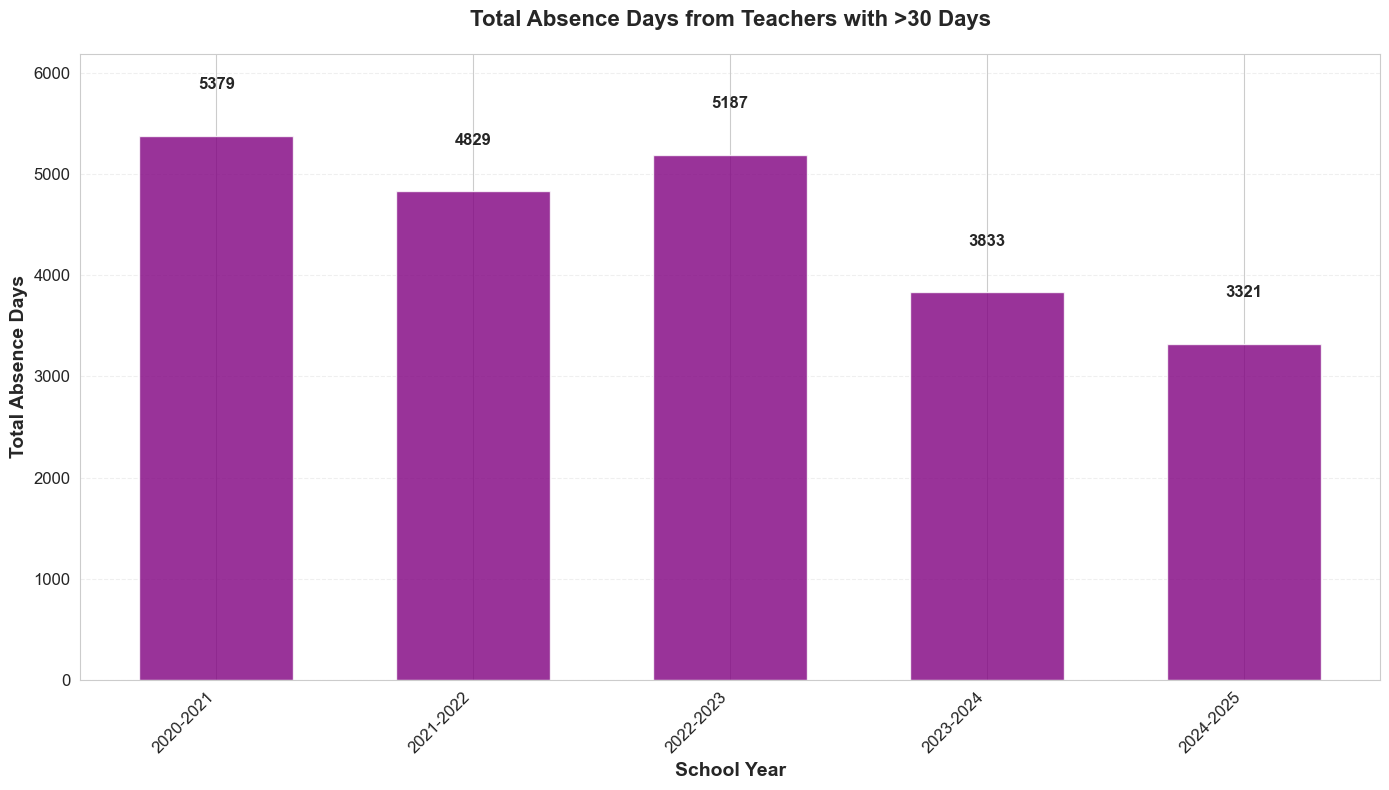

In [ ]:
# Total Absence Days from Teachers with >30 Days
threshold = 30
data = results[threshold]

years = sorted(teacher_absence_days['School Year'].unique())
total_days = [data['total_days_above'].get(year, 0) for year in years]

plt.figure(figsize=(14, 8))
plt.bar(years, total_days, color='purple', width=0.6, alpha=0.8)

max_value = max(total_days) if total_days else 0
plt.ylim(0, max_value * 1.15)

plt.title(f'Total Absence Days from Teachers with >30 Days', 
         fontsize=16, fontweight='bold', pad=20)
plt.xlabel('School Year', fontsize=14, fontweight='bold')
plt.ylabel('Total Absence Days', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=12, ha='right')
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=0.3, linestyle='--')

offset = max(max_value * 0.08, 150)
for i, v in enumerate(total_days):
    plt.text(i, v + offset, f'{int(v)}', ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()


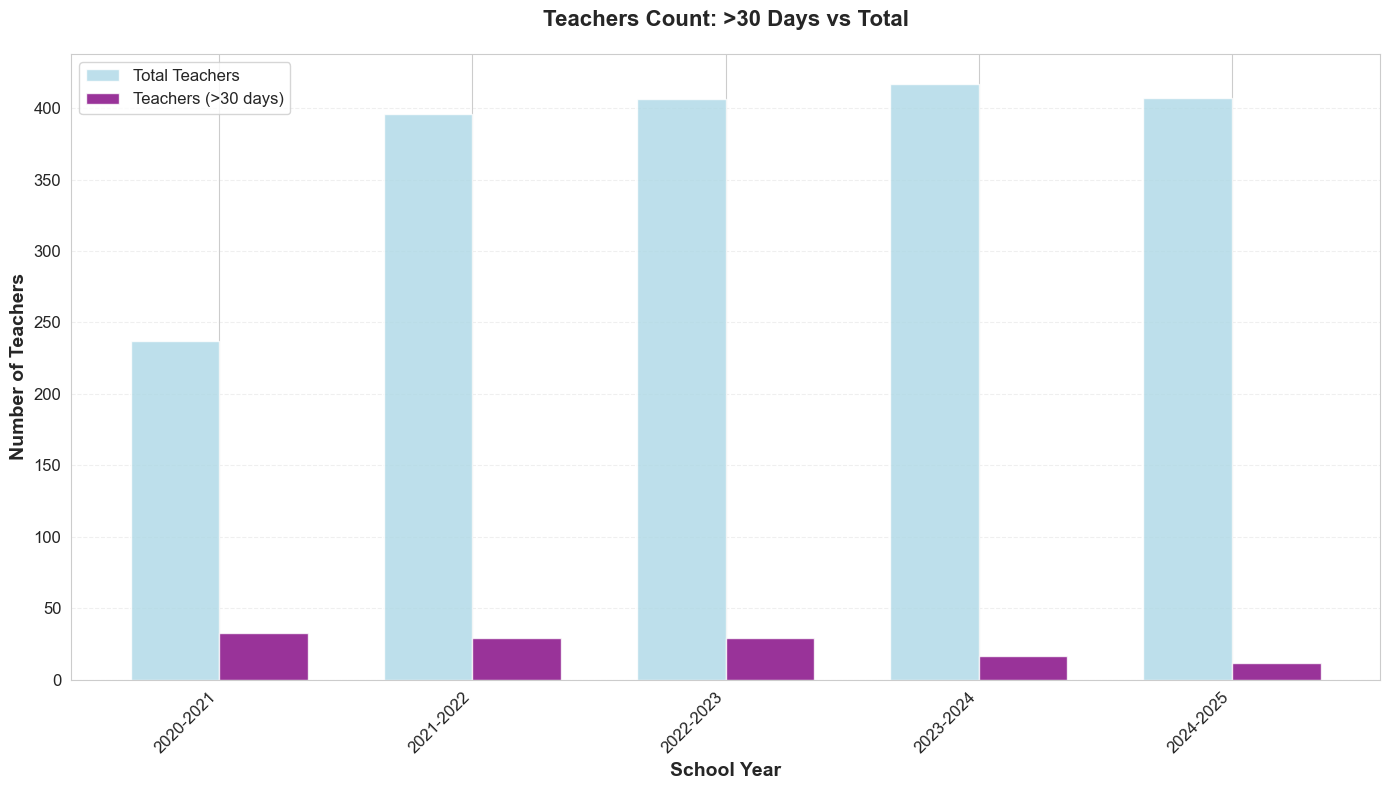

In [ ]:
# Teachers Count: >30 Days vs Total
threshold = 30
data = results[threshold]

years = sorted(teacher_absence_days['School Year'].unique())
total_teachers = [data['total_teachers'].get(year, 0) for year in years]
teachers_above = [data['teachers_above'].get(year, 0) for year in years]

x = np.arange(len(years))
width = 0.35

plt.figure(figsize=(14, 8))
plt.bar(x - width/2, total_teachers, width, label='Total Teachers', color='lightblue', alpha=0.8)
plt.bar(x + width/2, teachers_above, width, label=f'Teachers (>30 days)', color='purple', alpha=0.8)
plt.title(f'Teachers Count: >30 Days vs Total', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('School Year', fontsize=14, fontweight='bold')
plt.ylabel('Number of Teachers', fontsize=14, fontweight='bold')
plt.xticks(x, years, rotation=45, fontsize=12, ha='right')
plt.yticks(fontsize=12)
plt.legend(fontsize=12, loc='upper left')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()


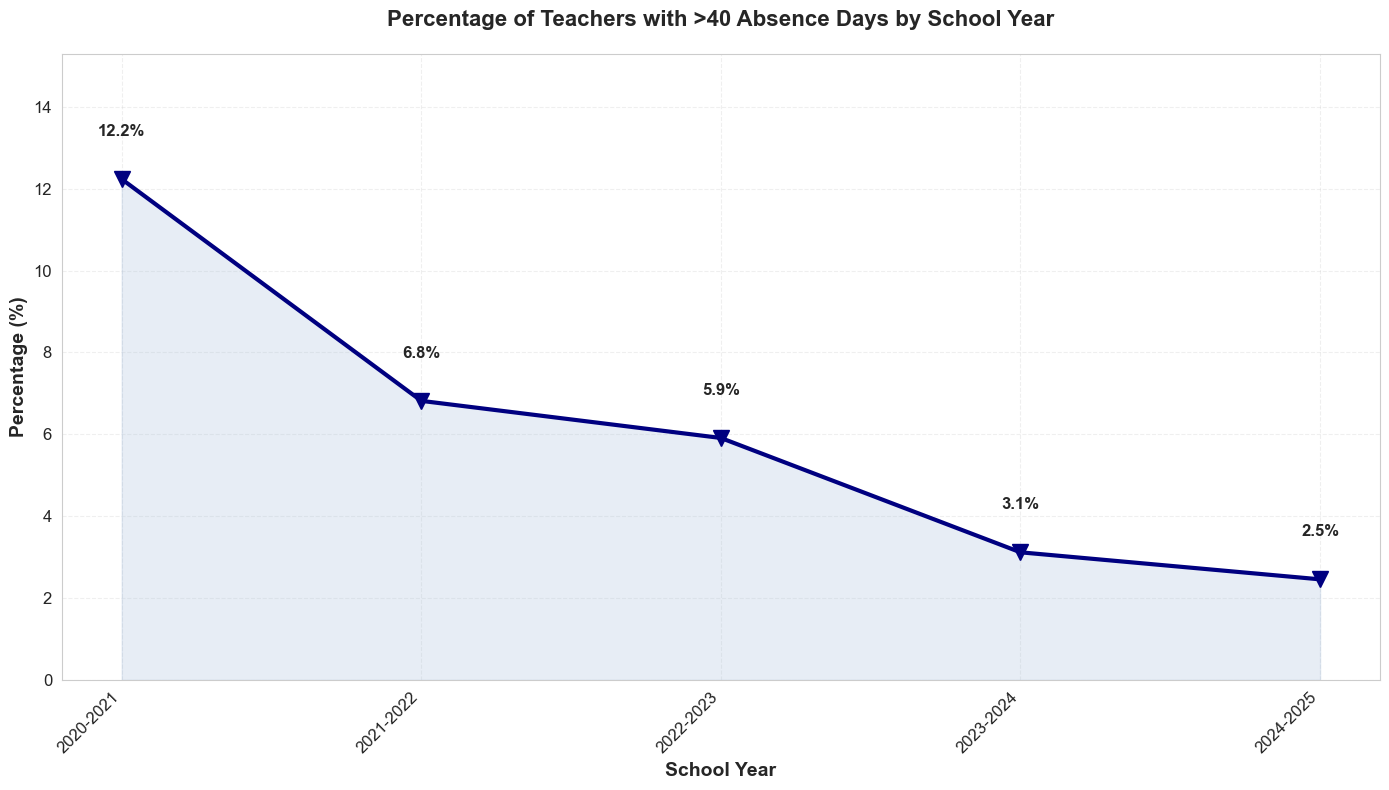

In [ ]:
# Percentage of Teachers with >40 Absence Days by School Year
threshold = 40
data = results[threshold]

years = sorted(teacher_absence_days['School Year'].unique())
pct_teachers = [data['pct_teachers'].get(year, 0) for year in years]

plt.figure(figsize=(14, 8))
plt.plot(years, pct_teachers, marker='v', linewidth=3, markersize=12, color='navy')
plt.fill_between(years, pct_teachers, alpha=0.3, color='lightsteelblue')

max_pct = max(pct_teachers) if pct_teachers else 0
plt.ylim(0, max_pct * 1.25)

plt.title(f'Percentage of Teachers with >40 Absence Days by School Year', 
         fontsize=16, fontweight='bold', pad=20)
plt.xlabel('School Year', fontsize=14, fontweight='bold')
plt.ylabel('Percentage (%)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=12, ha='right')
plt.yticks(fontsize=12)
plt.grid(True, alpha=0.3, linestyle='--')

offset = max(max_pct * 0.08, 0.5)
for i, v in enumerate(pct_teachers):
    plt.text(i, v + offset, f'{v:.1f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()


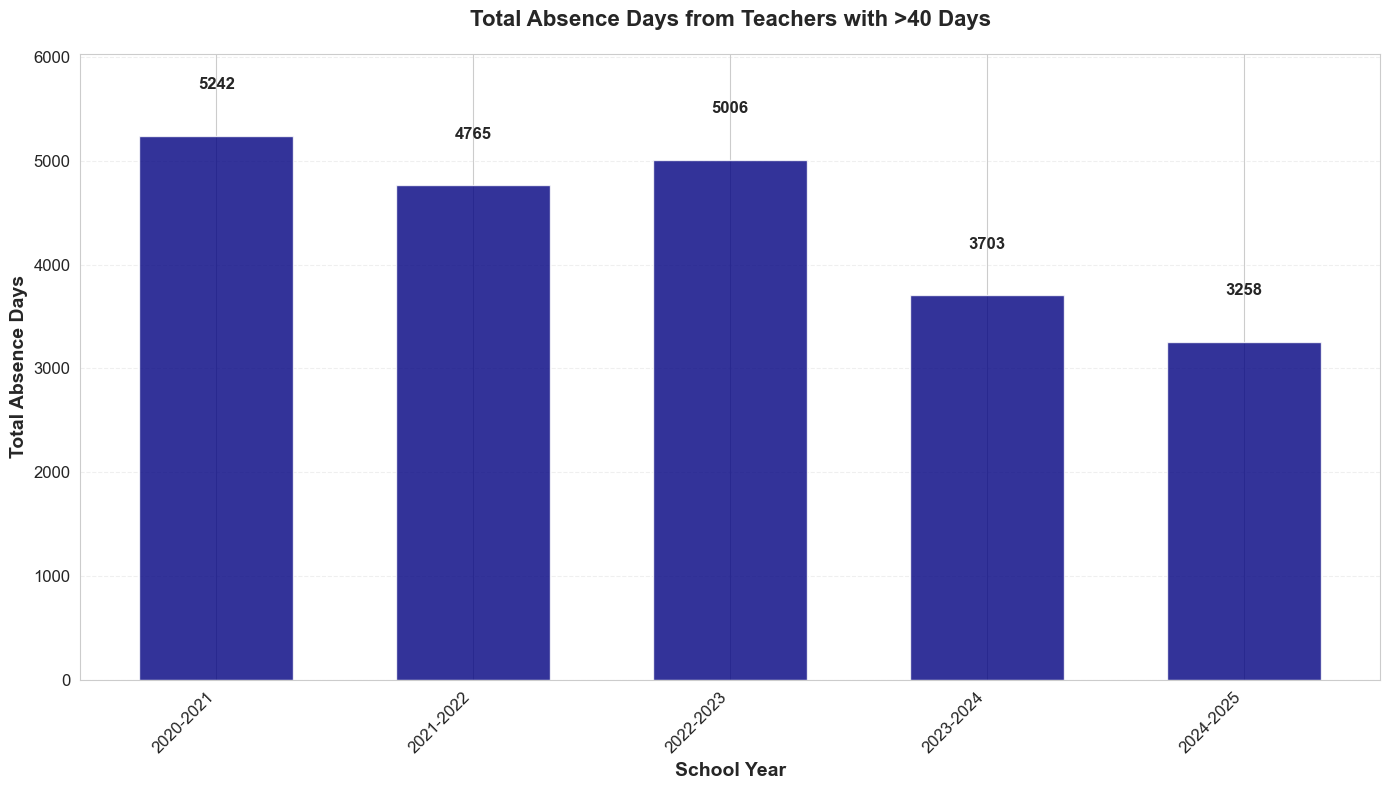

In [ ]:
# Total Absence Days from Teachers with >40 Days
threshold = 40
data = results[threshold]

years = sorted(teacher_absence_days['School Year'].unique())
total_days = [data['total_days_above'].get(year, 0) for year in years]

plt.figure(figsize=(14, 8))
plt.bar(years, total_days, color='navy', width=0.6, alpha=0.8)

max_value = max(total_days) if total_days else 0
plt.ylim(0, max_value * 1.15)

plt.title(f'Total Absence Days from Teachers with >40 Days', 
         fontsize=16, fontweight='bold', pad=20)
plt.xlabel('School Year', fontsize=14, fontweight='bold')
plt.ylabel('Total Absence Days', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=12, ha='right')
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=0.3, linestyle='--')

offset = max(max_value * 0.08, 100)
for i, v in enumerate(total_days):
    plt.text(i, v + offset, f'{int(v)}', ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()


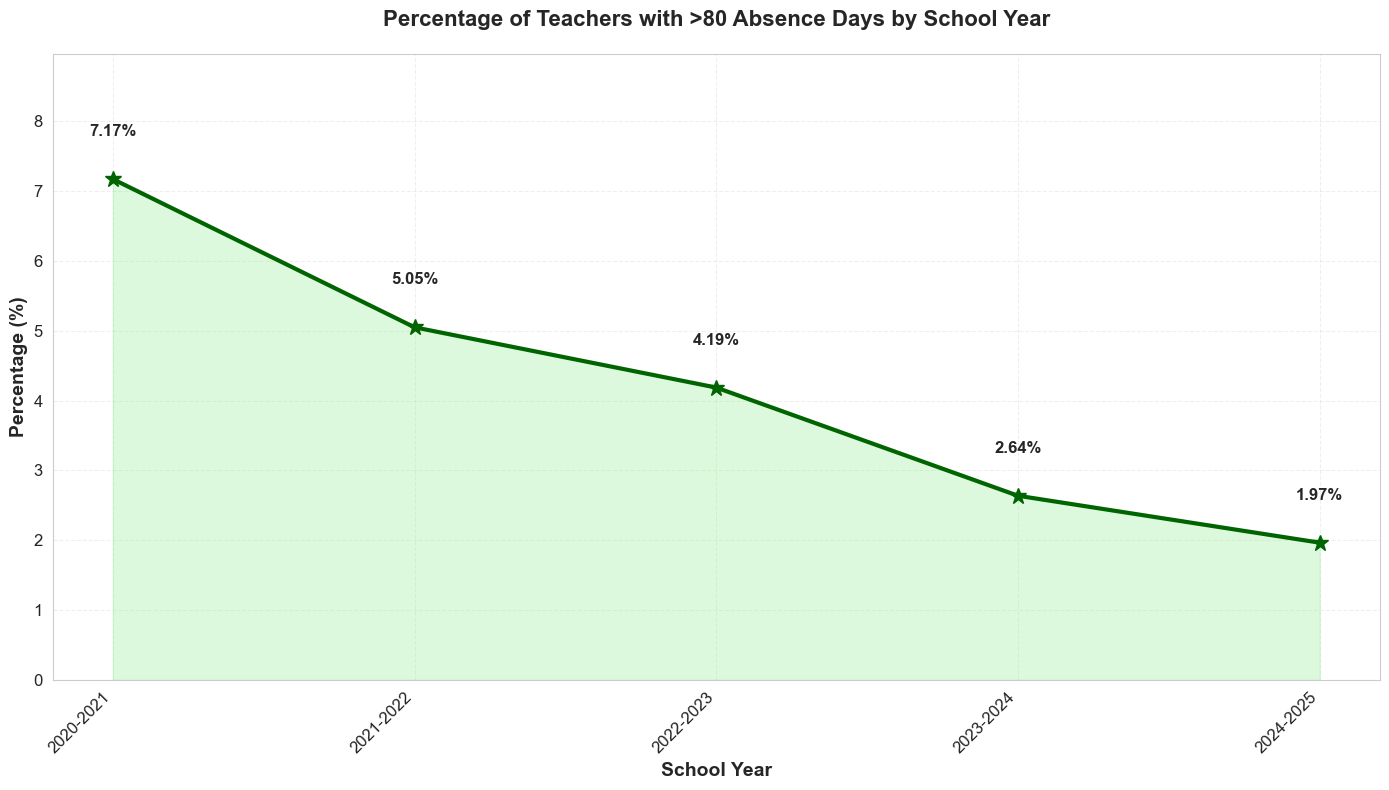

In [ ]:
# Percentage of Teachers with >80 Absence Days by School Year
threshold = 80
data = results[threshold]

years = sorted(teacher_absence_days['School Year'].unique())
pct_teachers = [data['pct_teachers'].get(year, 0) for year in years]

plt.figure(figsize=(14, 8))
plt.plot(years, pct_teachers, marker='*', linewidth=3, markersize=12, color='darkgreen')
plt.fill_between(years, pct_teachers, alpha=0.3, color='lightgreen')

# Set y-axis limit to give more room for labels
max_pct = max(pct_teachers) if pct_teachers else 0
if max_pct == 0:
    plt.ylim(0, 1)  # Set minimum range when all values are 0
else:
    plt.ylim(0, max(max_pct * 1.25, 0.5))  # Add 25% more space at top, minimum 0.5%

plt.title(f'Percentage of Teachers with >80 Absence Days by School Year', 
         fontsize=16, fontweight='bold', pad=20)
plt.xlabel('School Year', fontsize=14, fontweight='bold')
plt.ylabel('Percentage (%)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=12, ha='right')  # Align rotated labels to the right
plt.yticks(fontsize=12)
plt.grid(True, alpha=0.3, linestyle='--')

# Position labels with better offset
for i, v in enumerate(pct_teachers):
    if v > 0:
        offset = max(max_pct * 0.08, 0.05)  # Use 8% of max or at least 0.05
        plt.text(i, v + offset, f'{v:.2f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')
    else:
        # Show 0% label for zero values
        plt.text(i, 0.02, '0.0%', ha='center', va='bottom', fontsize=12, fontweight='bold', color='gray', alpha=0.7)
plt.tight_layout()
plt.show()

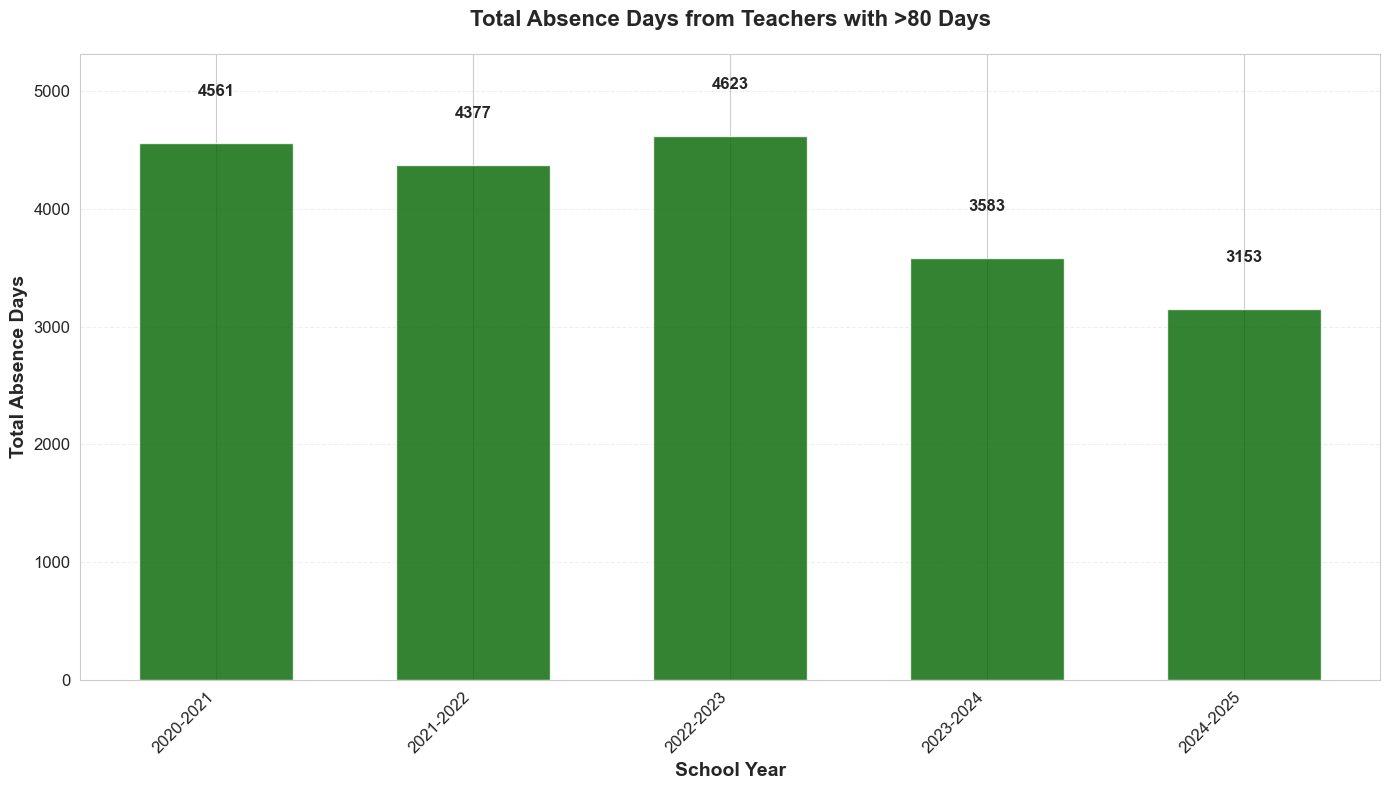

In [ ]:
# Total Absence Days from Teachers with >80 Days
threshold = 80
data = results[threshold]

years = sorted(teacher_absence_days['School Year'].unique())
total_days = [data['total_days_above'].get(year, 0) for year in years]

plt.figure(figsize=(14, 8))
plt.bar(years, total_days, color='darkgreen', width=0.6, alpha=0.8)

# Set y-axis limit to give more room for labels
max_value = max(total_days) if total_days else 0
if max_value == 0:
    plt.ylim(0, 50)  # Set minimum range when all values are 0
else:
    plt.ylim(0, max_value * 1.15)  # Add 15% more space at top

plt.title(f'Total Absence Days from Teachers with >80 Days', 
         fontsize=16, fontweight='bold', pad=20)
plt.xlabel('School Year', fontsize=14, fontweight='bold')
plt.ylabel('Total Absence Days', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=12, ha='right')  # Align rotated labels to the right
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Position labels with better offset
for i, v in enumerate(total_days):
    if v > 0:
        offset = max(max_value * 0.08, 5)  # Use 8% of max or at least 5
        plt.text(i, v + offset, f'{int(v)}', ha='center', va='bottom', fontsize=12, fontweight='bold')
    else:
        # Show 0 label for zero values
        plt.text(i, 2, '0', ha='center', va='bottom', fontsize=12, fontweight='bold', color='gray', alpha=0.7)
plt.tight_layout()
plt.show()

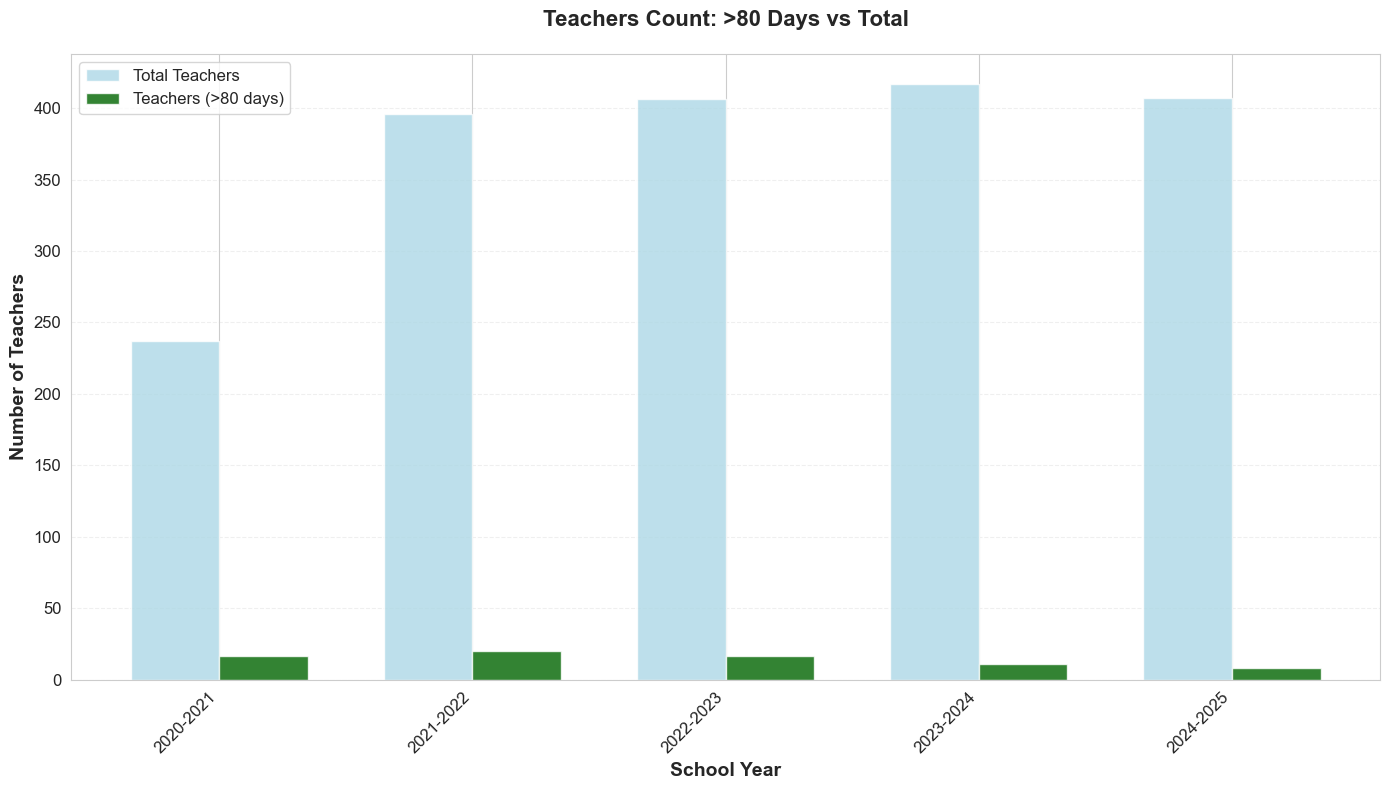

In [ ]:
# Teachers Count: >80 Days vs Total
threshold = 80
data = results[threshold]

years = sorted(teacher_absence_days['School Year'].unique())
total_teachers = [data['total_teachers'].get(year, 0) for year in years]
teachers_above = [data['teachers_above'].get(year, 0) for year in years]

x = np.arange(len(years))
width = 0.35

plt.figure(figsize=(14, 8))
plt.bar(x - width/2, total_teachers, width, label='Total Teachers', color='lightblue', alpha=0.8)
plt.bar(x + width/2, teachers_above, width, label=f'Teachers (>80 days)', color='darkgreen', alpha=0.8)
plt.title(f'Teachers Count: >80 Days vs Total', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('School Year', fontsize=14, fontweight='bold')
plt.ylabel('Number of Teachers', fontsize=14, fontweight='bold')
plt.xticks(x, years, rotation=45, fontsize=12, ha='right')
plt.yticks(fontsize=12)
plt.legend(fontsize=12, loc='upper left')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

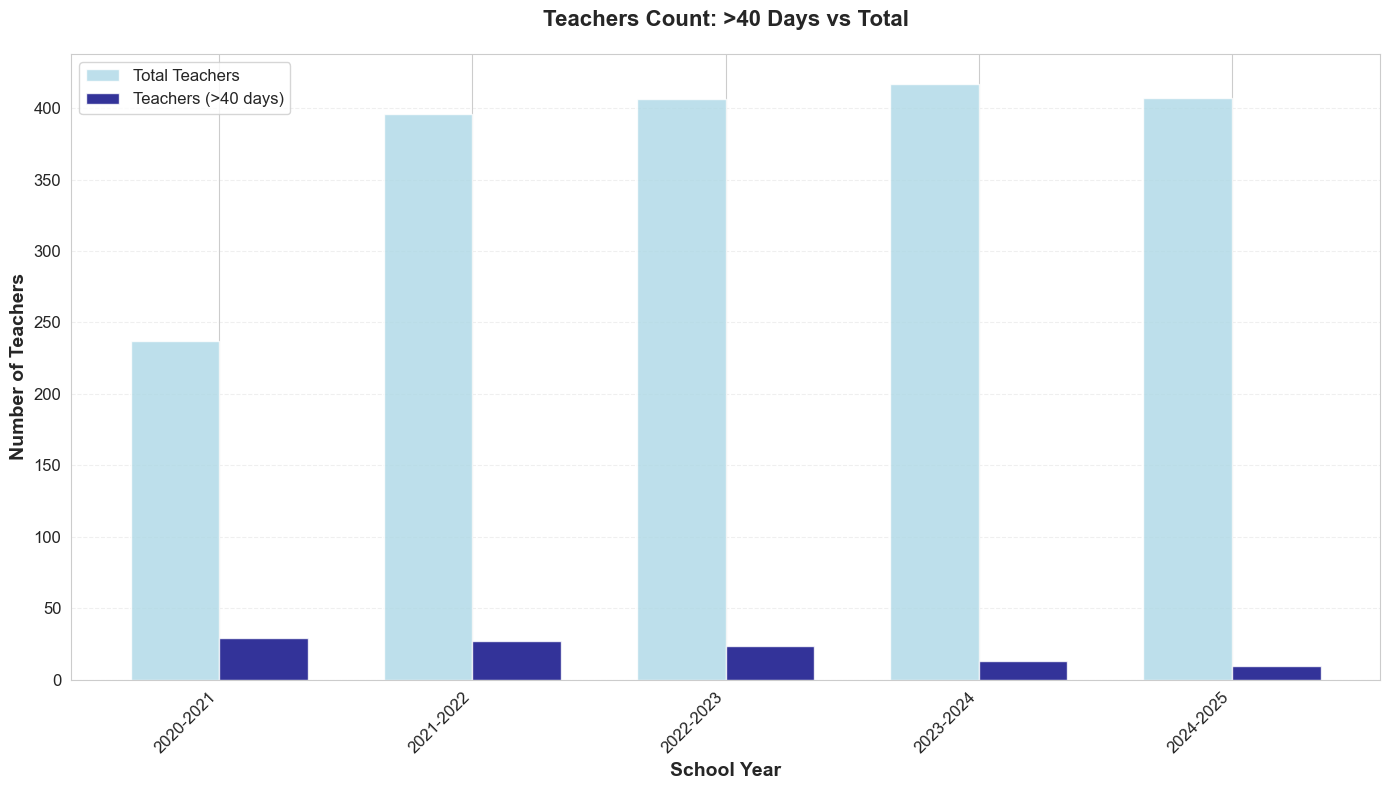

In [ ]:
# Teachers Count: >40 Days vs Total
threshold = 40
data = results[threshold]

years = sorted(teacher_absence_days['School Year'].unique())
total_teachers = [data['total_teachers'].get(year, 0) for year in years]
teachers_above = [data['teachers_above'].get(year, 0) for year in years]

x = np.arange(len(years))
width = 0.35

plt.figure(figsize=(14, 8))
plt.bar(x - width/2, total_teachers, width, label='Total Teachers', color='lightblue', alpha=0.8)
plt.bar(x + width/2, teachers_above, width, label=f'Teachers (>40 days)', color='navy', alpha=0.8)
plt.title(f'Teachers Count: >40 Days vs Total', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('School Year', fontsize=14, fontweight='bold')
plt.ylabel('Number of Teachers', fontsize=14, fontweight='bold')
plt.xticks(x, years, rotation=45, fontsize=12, ha='right')
plt.yticks(fontsize=12)
plt.legend(fontsize=12, loc='upper left')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()


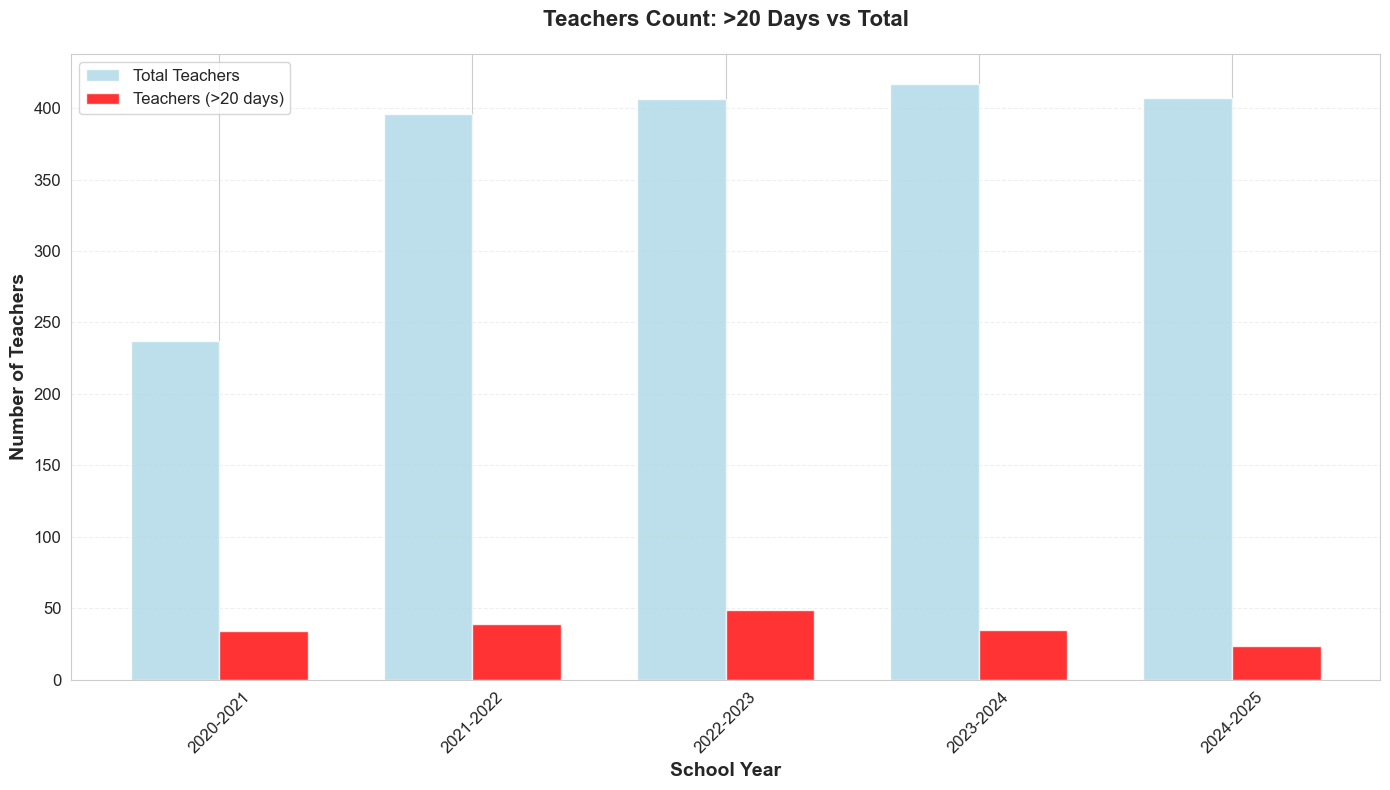

In [ ]:
# Teachers Count: >20 Days vs Total
threshold = 20
data = results[threshold]

years = sorted(teacher_absence_days['School Year'].unique())
total_teachers = [data['total_teachers'].get(year, 0) for year in years]
teachers_above = [data['teachers_above'].get(year, 0) for year in years]

x = np.arange(len(years))
width = 0.35

plt.figure(figsize=(14, 8))
plt.bar(x - width/2, total_teachers, width, label='Total Teachers', color='lightblue', alpha=0.8)
plt.bar(x + width/2, teachers_above, width, label=f'Teachers (>20 days)', color='red', alpha=0.8)
plt.title(f'Teachers Count: >20 Days vs Total', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('School Year', fontsize=14, fontweight='bold')
plt.ylabel('Number of Teachers', fontsize=14, fontweight='bold')
plt.xticks(x, years, rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12, loc='upper left')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()


